In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import glob
from sklearn.preprocessing import LabelEncoder
from matplotlib import rcParams
from scipy import stats
import openpyxl

In [2]:
# get data file names
path =r'.'
filenames = glob.glob(path + "/data/LoanStats_securev1_2019Q1.csv.zip")

In [3]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,skiprows=1,low_memory=False))
# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True) 

In [4]:
print("total_records in input raw data frame",big_frame['id'].count())
big_frame.head()

total_records in input raw data frame 115575


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,148406308,NaN,12000.0,12000.0,12000.0,60 months,16.40%,294.38,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,148501522,NaN,30000.0,30000.0,30000.0,60 months,20.00%,794.82,D,D2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,149437986,NaN,2800.0,2800.0,2775.0,36 months,8.19%,87.99,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,149444032,NaN,20000.0,20000.0,20000.0,60 months,22.50%,558.08,D,D3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,149497729,NaN,25000.0,25000.0,25000.0,36 months,7.56%,778.35,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
big_frame.info()

loan_all = big_frame.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115575 entries, 0 to 115574
Columns: 150 entries, id to settlement_term
dtypes: float64(112), object(38)
memory usage: 132.3+ MB


In [6]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    total_records = big_frame['id'].count()
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values  
    summary['Missing Percentage'] = df.isnull().sum().values/total_records * 100
    summary['Uniques'] = df.nunique().values
    #summary['Mean Value'] = df.mean().values
    #summary['Median Value'] = df.median().values
    #summary['First Value'] = df.loc[0].values
    #summary['Second Value'] = df.loc[1].values
    #summary['Third Value'] = df.loc[2].values
    #summary.round({'Mean Value':2})
    summary.round({'Missing Percentage':2})

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [7]:
#summary_columns_stats = resumetable(loan_all[:])[:60]
summary_columns_stats = resumetable(loan_all[:])

Dataset Shape: (115575, 150)


In [8]:
summary_columns_stats

,Name,dtypes,Missing,Missing Percentage,Uniques,Entropy
0,id,object,0,0.000000,115575,16.82
1,member_id,float64,115575,100.000000,0,0.00
2,loan_amnt,float64,2,0.001730,1499,6.05
3,funded_amnt,float64,2,0.001730,1499,6.05
4,funded_amnt_inv,float64,2,0.001730,1525,6.25
...,...,...,...,...,...,...
145,settlement_status,object,115245,99.714471,3,0.62
146,settlement_date,object,115245,99.714471,9,2.65
147,settlement_amount,float64,115245,99.714471,327,8.35
148,settlement_percentage,float64,115245,99.714471,74,4.19


In [94]:
summary_columns_stats.to_excel("summary_columns_stats.xlsx")

In [9]:
print(len(loan_all.columns))

150


In [10]:
#PreProcessing
#identify columns where data missing data percentage is more than 50%
#columns for missing data more than 33%
missing_values = [x for x in ((big_frame.isnull().sum()/len(big_frame) * 100) > 50)]
type(missing_values)
#print(missing_values)
missing_values_1 = [ x for x in missing_values]
#print(missing_values_1)
columns_missing_data = big_frame.columns[missing_values]
print(columns_missing_data)

Index(['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_

In [11]:
#drop columns having missing percentage more than 50%
loan_all.drop(loan_all.columns[missing_values], axis=1, inplace=True)

In [12]:
#Functionaly these columns are insignificant and can be staright away removed
loan_all.drop(['id', 'url', 'zip_code' ,'title' ], axis=1, inplace=True)


In [13]:
print(len(loan_all.columns))

103


In [14]:
print(len(loan_all.columns))

103


In [15]:
#int_rate has special character %, remove it
loan_all['int_rate']=loan_all['int_rate'].astype(str)
loan_all['int_rate']= loan_all['int_rate'].map(lambda x: x.rstrip('%'))
loan_all['int_rate']= loan_all['int_rate'].astype(float)

In [16]:
#print columns which have unique values
unique = loan_all.nunique()
unique = unique[unique.values == 1]
print(unique)

policy_code         1
acc_now_delinq      1
num_tl_120dpd_2m    1
num_tl_30dpd        1
tax_liens           1
dtype: int64


In [17]:
#drop all those columns which have only one value for the entire column
unique = loan_all.nunique()
unique = unique[unique.values == 1]
loan_all.drop(labels = list(unique.index), axis =1, inplace=True)

In [18]:
print(len(loan_all.columns))

98


In [19]:
# TO DELETE
missing_values_cols_list = list(columns_missing_data.values)
missing_values_cols_list.append('loan_status')

In [45]:
#1. selecting features based on correlation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
X_temp= loan_all[loan_all.columns.difference(['loan_status'])] #except label
y_temp = loan_all['loan_status']

#encode the categorial or string variables to number using encoding 
selected_columns =X_temp.columns
categorical_columns = X_temp.select_dtypes(include='object').columns
for x in categorical_columns:
    X_temp[x] = label_encoder.fit_transform(X_temp[x].astype(str)).astype('float64')

C:\Users\aniljain\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


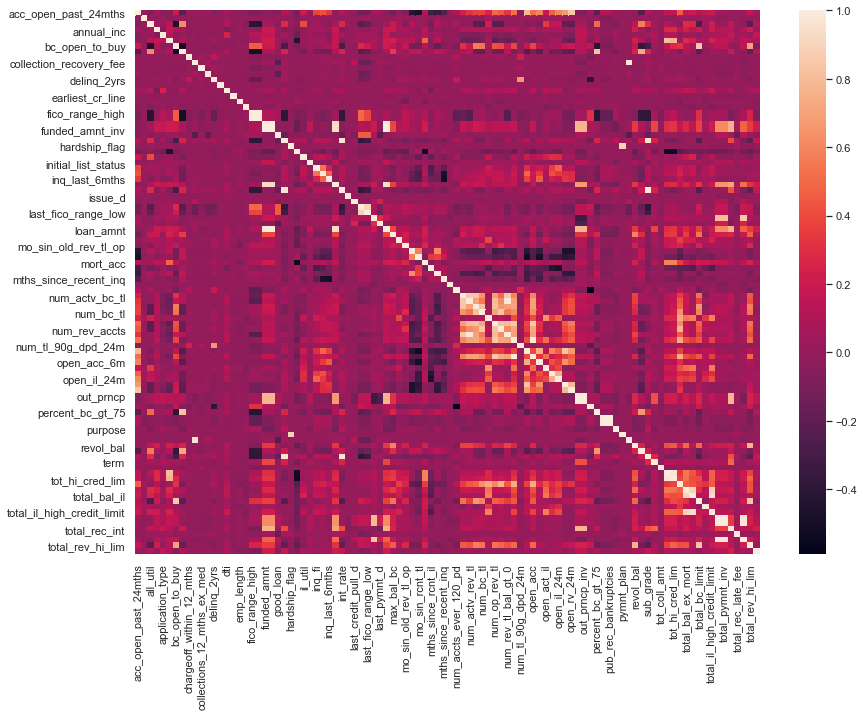

In [46]:
sns.set(rc={'figure.figsize':(14,10)})
corrMatrix = X_temp.corr()
sns.heatmap(corrMatrix)

In [47]:
#Next, we compare the correlation between features  and identify highly correlated variables 
#and remove one of two features that have a correlation higher than 0.8
cols = np.full((corrMatrix.shape[0],), True, dtype=bool)
cols_1 = []
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
        #if (corrMatrix.columns[j] == 'loan_status'):
        if (corrMatrix.iloc[i,j] >= 0.8 or corrMatrix.iloc[i,j] <= -0.8 ):
            cols_1.append("(" + corrMatrix.index[i] + "is highly correlated to " 
                          + corrMatrix.columns[j]+ ")" + " has correlation value =" + str(corrMatrix.iloc[i,j]) )
            if cols[j]:
                cols[j] = False
#insignificant_columns = X_temp.columns[cols]
#print(insignificant_columns)
print(len(corrMatrix.columns))
print(len(cols))
cols_1

98
98


['(acc_open_past_24mthsis highly correlated to open_rv_24m) has correlation value =0.8403652057047645',
 '(avg_cur_balis highly correlated to tot_cur_bal) has correlation value =0.8098696004682636',
 '(bc_open_to_buyis highly correlated to total_bc_limit) has correlation value =0.8583929213010307',
 '(bc_utilis highly correlated to percent_bc_gt_75) has correlation value =0.8282392214947286',
 '(collection_recovery_feeis highly correlated to recoveries) has correlation value =0.9644564372182407',
 '(fico_range_highis highly correlated to fico_range_low) has correlation value =0.9999998597214033',
 '(funded_amntis highly correlated to funded_amnt_inv) has correlation value =0.9999967869834316',
 '(funded_amntis highly correlated to installment) has correlation value =0.9379095982600848',
 '(funded_amntis highly correlated to loan_amnt) has correlation value =1.0',
 '(funded_amnt_invis highly correlated to installment) has correlation value =0.9379017830265044',
 '(funded_amnt_invis high

In [48]:
X_temp.columns

Index(['acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc',
       'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs',
       'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv',
       'good_loan', 'grade', 'hardship_flag', 'home_ownership', 'il_util',
       'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt',
       'last_pymnt_d', 'loan_amnt', 'max_bal_bc', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_rcnt_il', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'next_pymnt_d', 'num_accts_ever_12

In [72]:
#1. correlation matrix 1
df_temp_1 = X_temp[['acc_open_past_24mths','addr_state','all_util','annual_inc','application_type','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med','debt_settlement_flag','delinq_2yrs','delinq_amnt','dti']]
corrs = df_temp_1.corr()

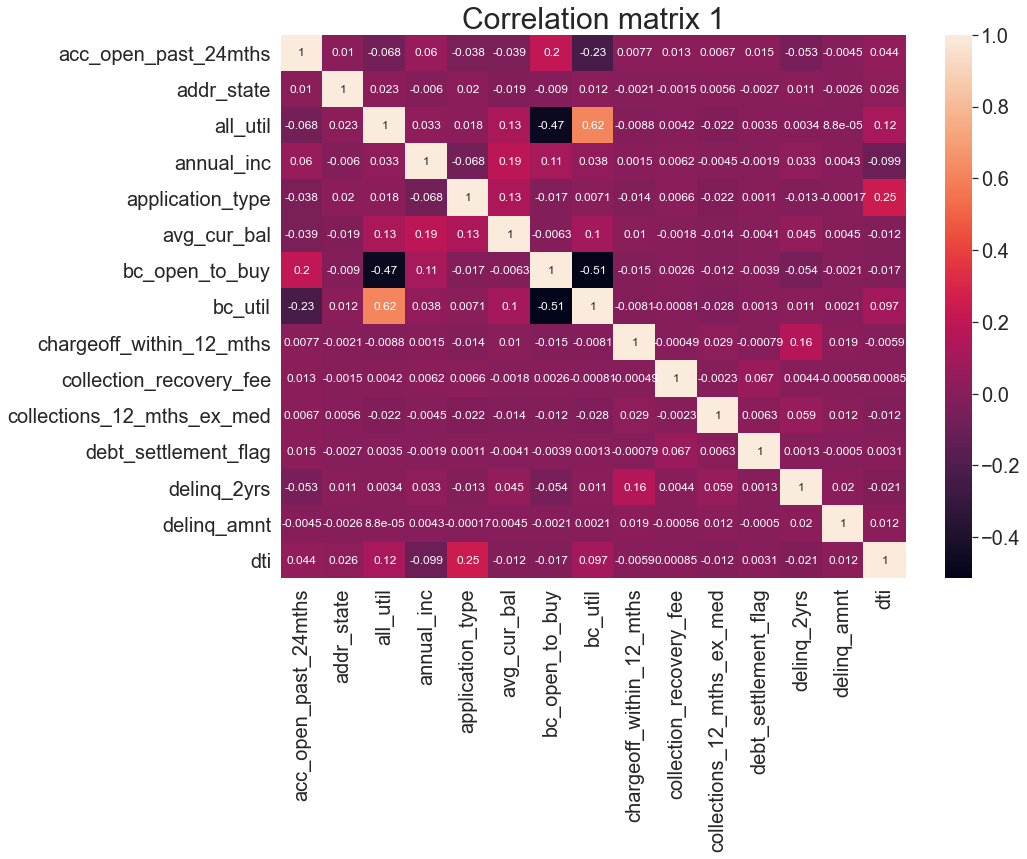

In [77]:
#1 sns.set(rc={'figure.figsize':(14,10)})
BIGGER_SIZE = 15
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE) 
plt.title('Correlation matrix 1', fontsize=30)
plt.show()


In [78]:
#2. correlation matrix 2
df_temp_2 = X_temp[['earliest_cr_line','emp_length','emp_title','fico_range_high','fico_range_low','funded_amnt','funded_amnt_inv','good_loan','grade','hardship_flag','home_ownership','il_util','initial_list_status','inq_fi','inq_last_12m']]
corrs = df_temp_2.corr()

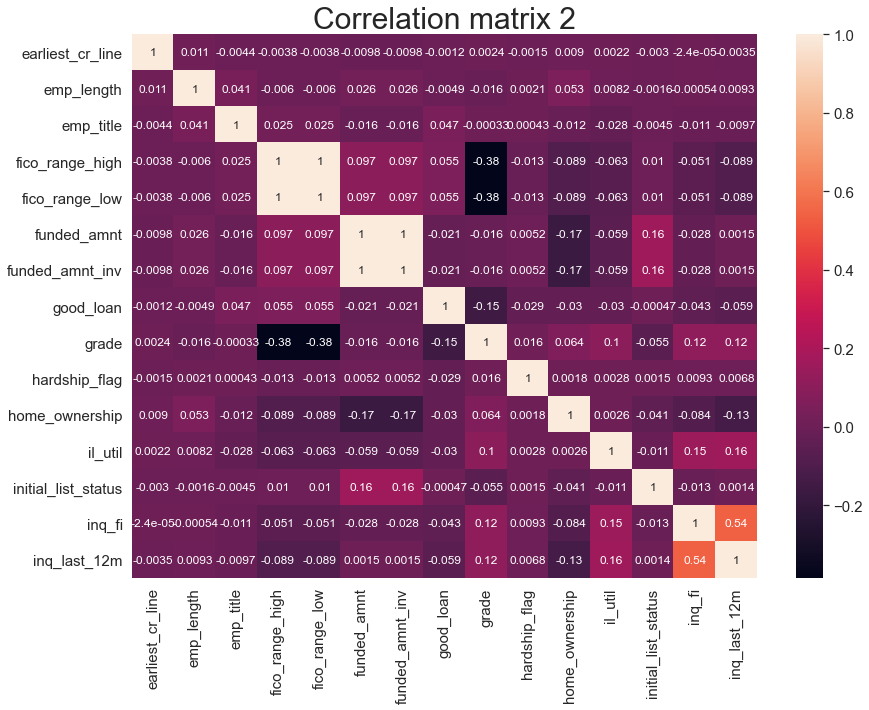

In [79]:
#2 sns.set(rc={'figure.figsize':(14,10)})
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.title('Correlation matrix 2', fontsize=30)
plt.show()

In [80]:
#3. correlation matrix 3
df_temp_3 = X_temp[['inq_last_6mths','installment','int_rate','issue_d','last_credit_pull_d','last_fico_range_high','last_fico_range_low','last_pymnt_amnt','last_pymnt_d','loan_amnt','max_bal_bc','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl']]
corrs = df_temp_3.corr()

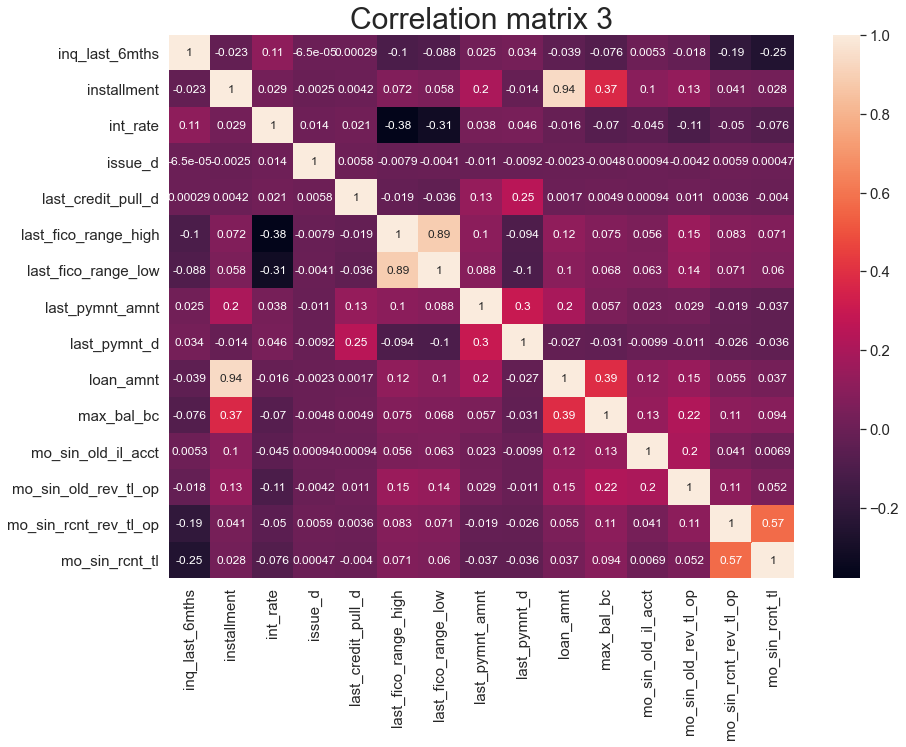

In [81]:
#3 sns.set(rc={'figure.figsize':(14,10)})
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.title('Correlation matrix 3', fontsize=30)
plt.show()

In [82]:
#4. correlation matrix 4
df_temp_4 = X_temp[['mort_acc','mths_since_rcnt_il','mths_since_recent_bc','mths_since_recent_inq','next_pymnt_d','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats']]
corrs = df_temp_4.corr()

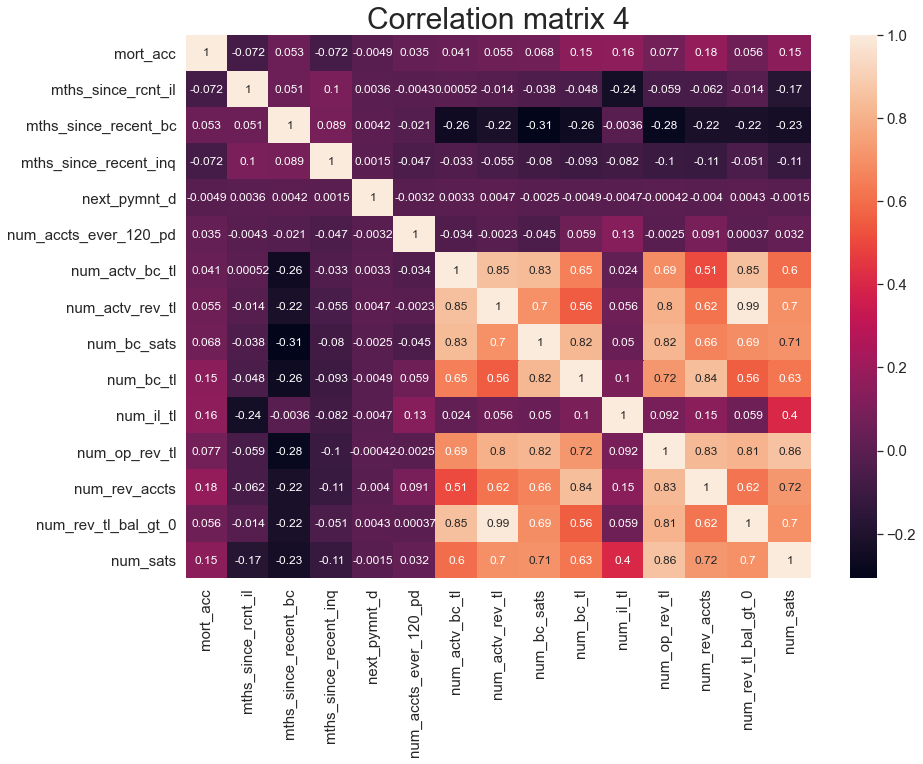

In [83]:
#4 sns.set(rc={'figure.figsize':(14,10)})
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.title('Correlation matrix 4', fontsize=30)
plt.show()

In [84]:
#5. correlation matrix 5
df_temp_5 = X_temp[['num_tl_90g_dpd_24m','num_tl_op_past_12m','open_acc','open_acc_6m','open_act_il','open_il_12m','open_il_24m','open_rv_12m','open_rv_24m','out_prncp','out_prncp_inv','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec','pub_rec_bankruptcies']]
corrs = df_temp_5.corr()

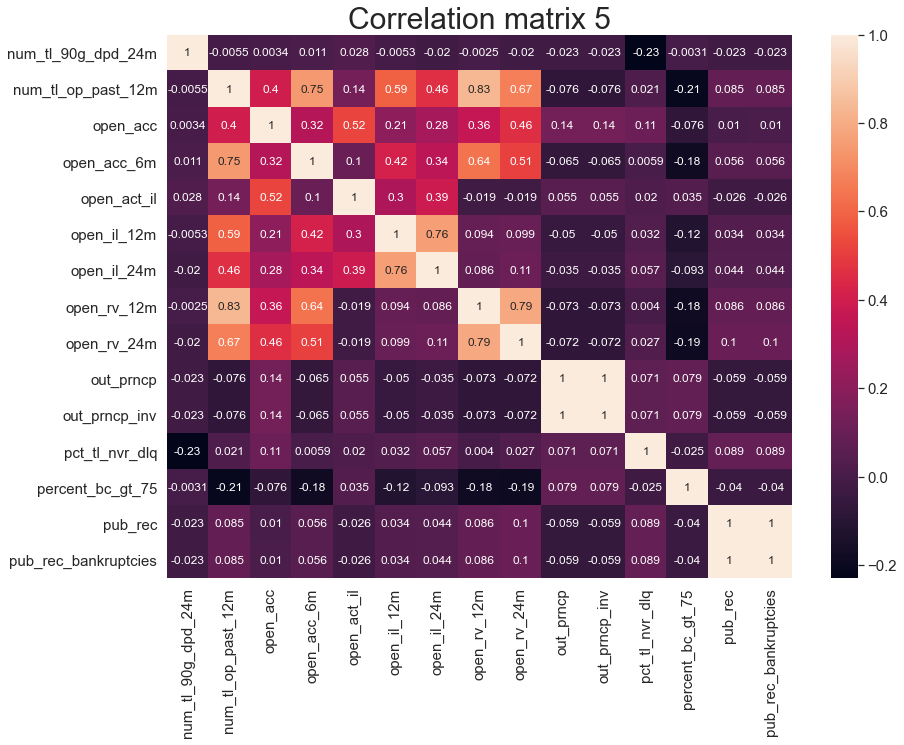

In [85]:
#5 sns.set(rc={'figure.figsize':(14,10)})
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.title('Correlation matrix 5', fontsize=30)
plt.show()

In [86]:
#6. correlation matrix 6
df_temp_6 = X_temp[['purpose','pymnt_plan','recoveries','revol_bal','revol_util','sub_grade','term','tot_coll_amt','tot_cur_bal','tot_hi_cred_lim','total_acc']]
corrs = df_temp_6.corr()

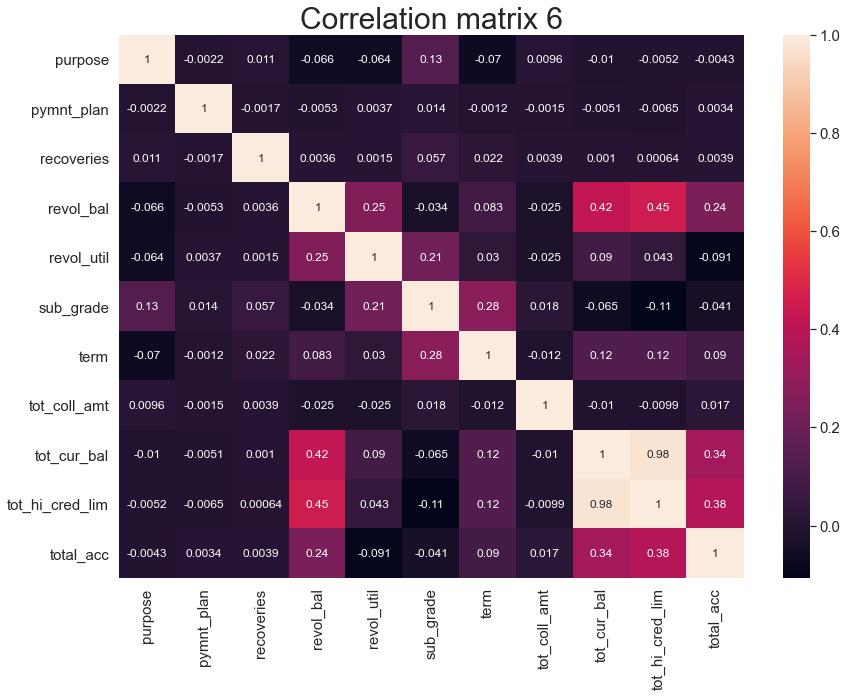

In [87]:
#6 sns.set(rc={'figure.figsize':(14,10)})
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.title('Correlation matrix 6', fontsize=30)
plt.show()

In [88]:
#7. correlation matrix 7
df_temp_6 = X_temp[['total_bal_ex_mort','total_bal_il','total_bc_limit','total_cu_tl','total_il_high_credit_limit','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','total_rev_hi_lim','verification_status']]
corrs = df_temp_6.corr()

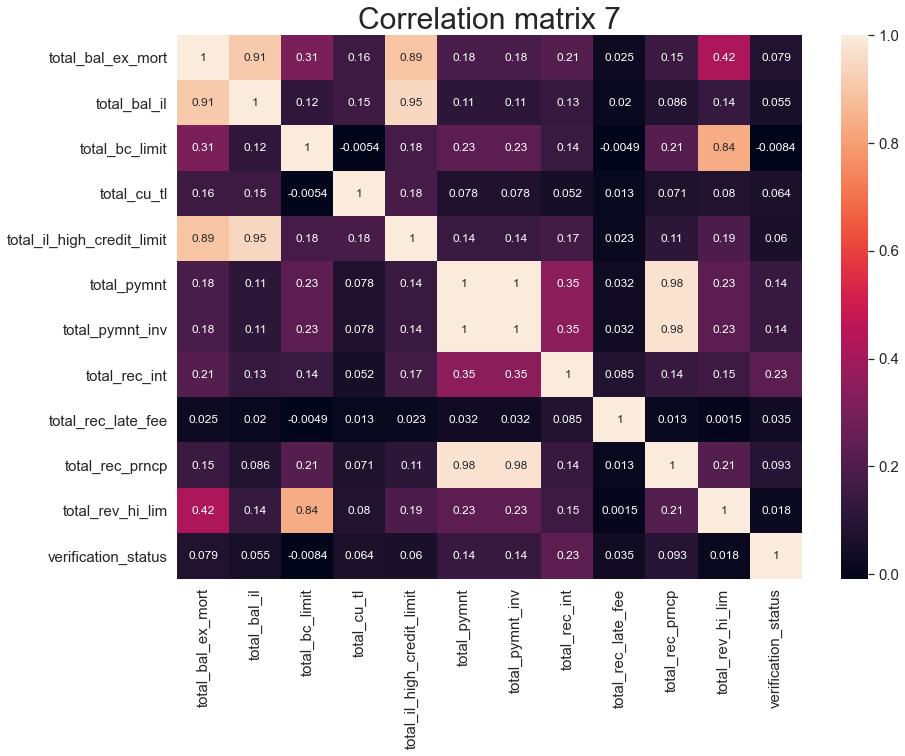

In [89]:
#7 sns.set(rc={'figure.figsize':(14,10)})
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.title('Correlation matrix 7', fontsize=30)
plt.show()

In [ ]:
#5 sns.set(rc={'figure.figsize':(14,10)})
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, annot=True, fmt='.2g')
plt.title('Correlation matrix')

In [26]:
#count of records before droping NAN records for the column which number is less than <=10
len(loan_all.index)

115575

In [27]:
# Delete rows which contains less than 10 non NaN values
loan_all = loan_all.dropna(thresh=10)
# Delete rows which contains less than 2 non NaN values
loan_all = loan_all.dropna(thresh=2)

In [28]:
#count of records after droping NAN records for the column which number is less than <=10
len(loan_all.index)

115573

In [29]:
print(len(loan_all.columns))

98


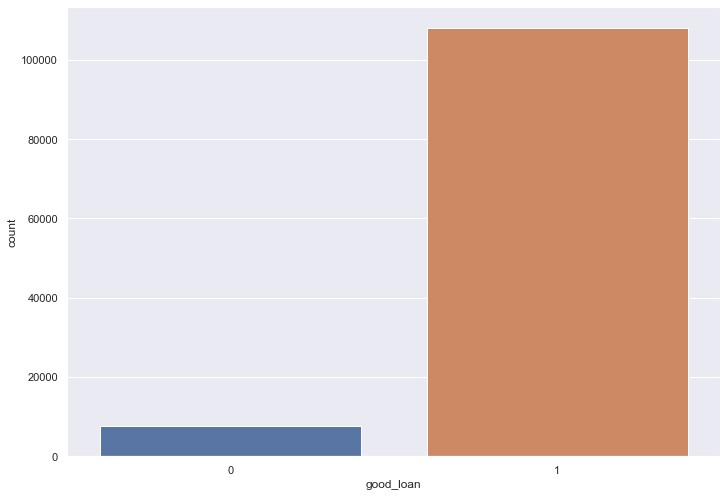

In [30]:
#target variable 'loan_status' is multiclass variable. For default prediction, it has to be transofrmed into 2 class variable
#derived variable 'good_loan' 
#distribution of derived variable 'good_loan'
# good loans are the loan_status with values  Fully paid, current 
#      and bad loans are loan status with values charged off,default, late, in grace period 
#deleting issued loans from data

loan_all['loan_status'].value_counts()/len(loan_all)
loan_all.drop(loan_all[loan_all.loan_status== 'Issued'].index, inplace=True)
loan_all['good_loan'] = np.where((loan_all.loan_status == 'Fully Paid') |
                        (loan_all.loan_status == 'Current'), 1, 0)
loan_all['good_loan'].value_counts()/len(loan_all)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot_good_vs_bad_loan = sns.countplot(loan_all['good_loan'])
fig_good_vs_bad_loan = sns_plot_good_vs_bad_loan.get_figure()
fig_good_vs_bad_loan.savefig("fig_good_vs_bad_loan.png")

In [31]:
# missing value treatment for continous variables
# let's make a function to create 2 variables from given variable:
# one filling NA with median, and another one filling NA with zeroes

def impute_na(df, variable):
    df[variable+'_median'] = df[variable].fillna(df[variable].median())
    df[variable+'_zero'] = df[variable].fillna(0) 
    df[variable+'_mean'] = df[variable].fillna(df[variable].mean()) 
    # random sampling
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [122]:
#1. missing value treatment strategy for column il_util
loan_tmp= loan_all[['il_util']] 


In [123]:
##1. Call impute_na function for column il_util . This function creates 4 new additional variables
impute_na(loan_tmp, 'il_util')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [124]:
#1. standard variance of the data distribution of column il_util before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation

print('Original Standard Deviation for column il_util: ', loan_tmp['il_util'].std())
print('Standard Deviation after median imputation for column il_util: ', loan_tmp['il_util_median'].std())
print('Standard Deviation after zero imputation for column il_util: ', loan_tmp['il_util_zero'].std())
print('Standard Deviation after random imputation for column il_util: ', loan_tmp['il_util_random'].std())
print('Standard Deviation after mean imputation for column il_util: ', loan_tmp['il_util_mean'].std())

Original Standard Deviation for column il_util:  23.494639880939975
Standard Deviation after median imputation for column il_util:  21.67654288553861
Standard Deviation after zero imputation for column il_util:  32.51013246342555
Standard Deviation after random imputation for column il_util:  23.522714266722335
Standard Deviation after mean imputation for column il_util:  21.66394217467229


Text(0.5,1,'column il_util with random imputation')

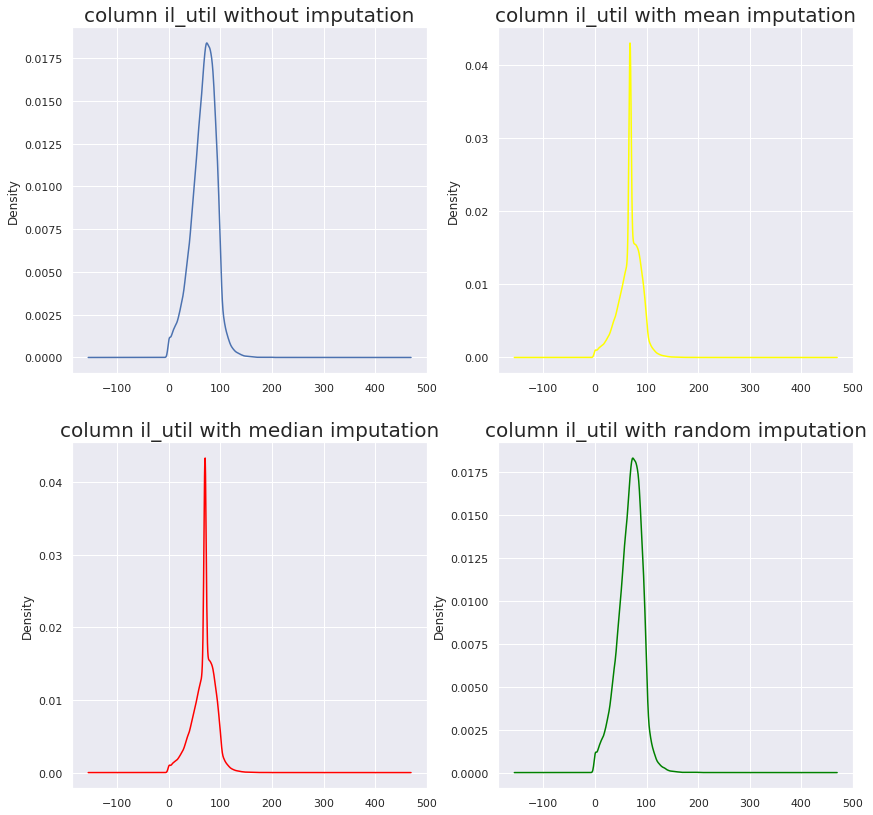

In [52]:
#1. plotting the data distruton of column il_util before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns il_util_mean, il_util_median and  il_util_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['il_util'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column il_util without imputation", fontsize=20)
plot2 = loan_tmp.il_util_mean.plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column il_util with mean imputation", fontsize=20)
plot3 = loan_tmp.il_util_median.plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column il_util with median imputation", fontsize=20)
plot4 = loan_tmp.il_util_random.plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column il_util with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

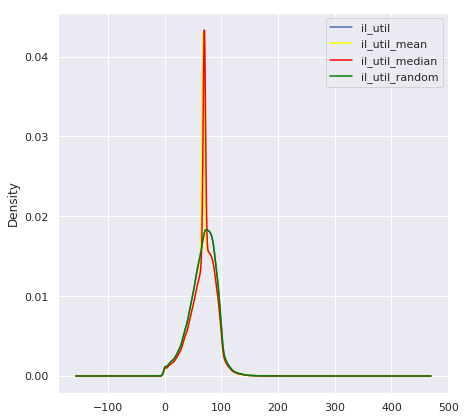

In [53]:
#1. plotting the data distruton of column il_util before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns il_util_mean, il_util_median and  il_util_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
loan_tmp['il_util'].plot(kind='kde', ax=ax)
loan_tmp.il_util_mean.plot(kind='kde', ax=ax, color='yellow')
loan_tmp.il_util_median.plot(kind='kde', ax=ax, color='red')
loan_tmp.il_util_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [54]:
#2. missing value treatment strategy for column mths_since_recent_inq
loan_tmp= loan_all[['mths_since_recent_inq']] 

In [55]:
##2. Call impute_na function for column il_util . This function creates 4 new additional variables
impute_na(loan_tmp, 'mths_since_recent_inq')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [57]:
#2. standard variance of the data distribution of column mths_since_recent_inq before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation

print('Original Standard Deviation for column mths_since_recent_inq: ', loan_tmp['mths_since_recent_inq'].std())
print('Standard Deviation after median imputation for column mths_since_recent_inq: ', loan_tmp['mths_since_recent_inq_median'].std())
print('Standard Deviation after zero imputation for column mths_since_recent_inq: ', loan_tmp['mths_since_recent_inq_zero'].std())
print('Standard Deviation after random imputation for column mths_since_recent_inq: ', loan_tmp['mths_since_recent_inq_random'].std())
print('Standard Deviation after mean imputation for column mths_since_recent_inq: ', loan_tmp['mths_since_recent_inq_mean'].std())

Original Standard Deviation for column mths_since_recent_inq:  6.0892532587965515
Standard Deviation after median imputation for column mths_since_recent_inq:  5.725088506094332
Standard Deviation after zero imputation for column mths_since_recent_inq:  6.233916810346667
Standard Deviation after random imputation for column mths_since_recent_inq:  6.091731469271355
Standard Deviation after mean imputation for column mths_since_recent_inq:  5.698748229484671


Text(0.5,1,'column mths_since_recent_inq \n with random imputation')

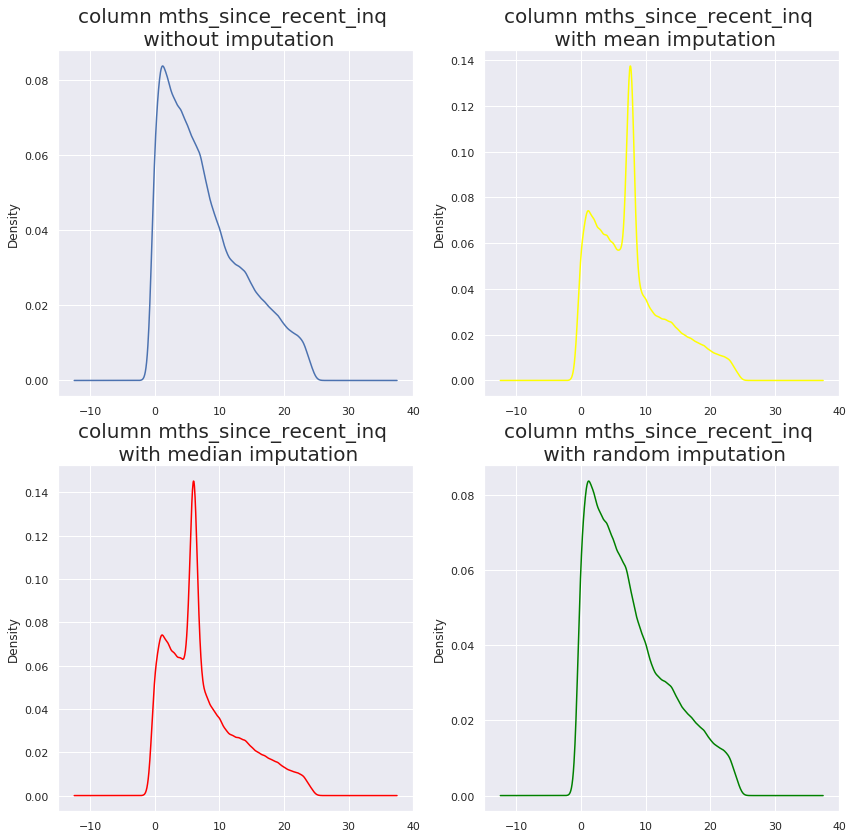

In [62]:
#2. plotting the data distruton of column mths_since_recent_inq before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mths_since_recent_inq_mean, mths_since_recent_inq_median and  mths_since_recent_inq_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['mths_since_recent_inq'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column mths_since_recent_inq \n without imputation", fontsize=20)
plot2 = loan_tmp.mths_since_recent_inq_mean.plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column mths_since_recent_inq \n with mean imputation", fontsize=20)
plot3 = loan_tmp.mths_since_recent_inq_median.plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column mths_since_recent_inq \n with median imputation", fontsize=20)
plot4 = loan_tmp.mths_since_recent_inq_random.plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column mths_since_recent_inq \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

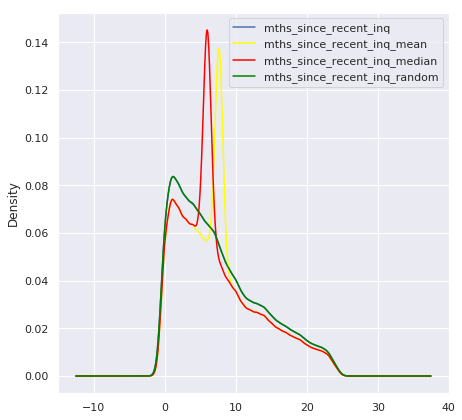

In [65]:
#2. plotting the data distruton of column mths_since_recent_inq before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mths_since_recent_inq_mean, mths_since_recent_inq_median and  mths_since_recent_inq_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['mths_since_recent_inq'].plot(kind='kde', ax=ax)
plot1 = loan_tmp.mths_since_recent_inq_mean.plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp.mths_since_recent_inq_median.plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp.mths_since_recent_inq_random.plot(kind='kde', ax=ax, color='green')
plot1.set_title("column mths_since_recent_inq data distribution ")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
#3. missing value treatment strategy for column mths_since_rcnt_il
loan_tmp= loan_all[['mths_since_rcnt_il']] 

In [26]:
##3. Call impute_na function for column mths_since_rcnt_il . This function creates 4 new additional variables
impute_na(loan_tmp, 'mths_since_rcnt_il')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [27]:
#3. standard variance of the data distribution of column mths_since_rcnt_il before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation

print('Original Standard Deviation for column mths_since_rcnt_il: ', loan_tmp['mths_since_rcnt_il'].std())
print('Standard Deviation after median imputation for column mths_since_rcnt_il: ', loan_tmp['mths_since_rcnt_il_median'].std())
print('Standard Deviation after zero imputation for column mths_since_rcnt_il: ', loan_tmp['mths_since_rcnt_il_zero'].std())
print('Standard Deviation after random imputation for column mths_since_rcnt_il: ', loan_tmp['mths_since_rcnt_il_random'].std())
print('Standard Deviation after mean imputation for column mths_since_rcnt_il: ', loan_tmp['mths_since_rcnt_il_mean'].std())

Original Standard Deviation for column mths_since_rcnt_il:  24.58639866252436
Standard Deviation after median imputation for column mths_since_rcnt_il:  24.241099216753607
Standard Deviation after zero imputation for column mths_since_rcnt_il:  24.45570302434135
Standard Deviation after random imputation for column mths_since_rcnt_il:  24.605673299843094
Standard Deviation after mean imputation for column mths_since_rcnt_il:  24.210059216429073


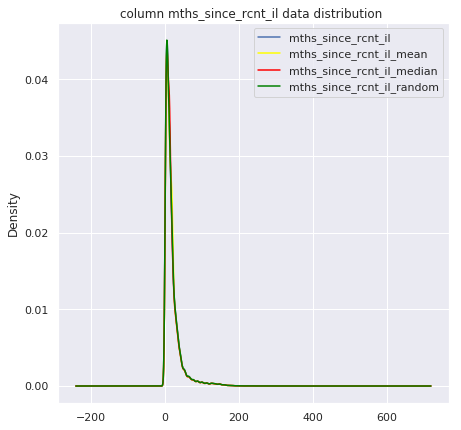

In [28]:
#3. plotting the data distruton of column mths_since_rcnt_il before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mths_since_rcnt_il_mean, mths_since_rcnt_il_median and  mths_since_rcnt_il_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['mths_since_rcnt_il'].plot(kind='kde', ax=ax)
plot1 = loan_tmp.mths_since_rcnt_il_mean.plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp.mths_since_rcnt_il_median.plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp.mths_since_rcnt_il_random.plot(kind='kde', ax=ax, color='green')
plot1.set_title("column mths_since_rcnt_il data distribution ")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column mths_since_rcnt_il \n with random imputation')

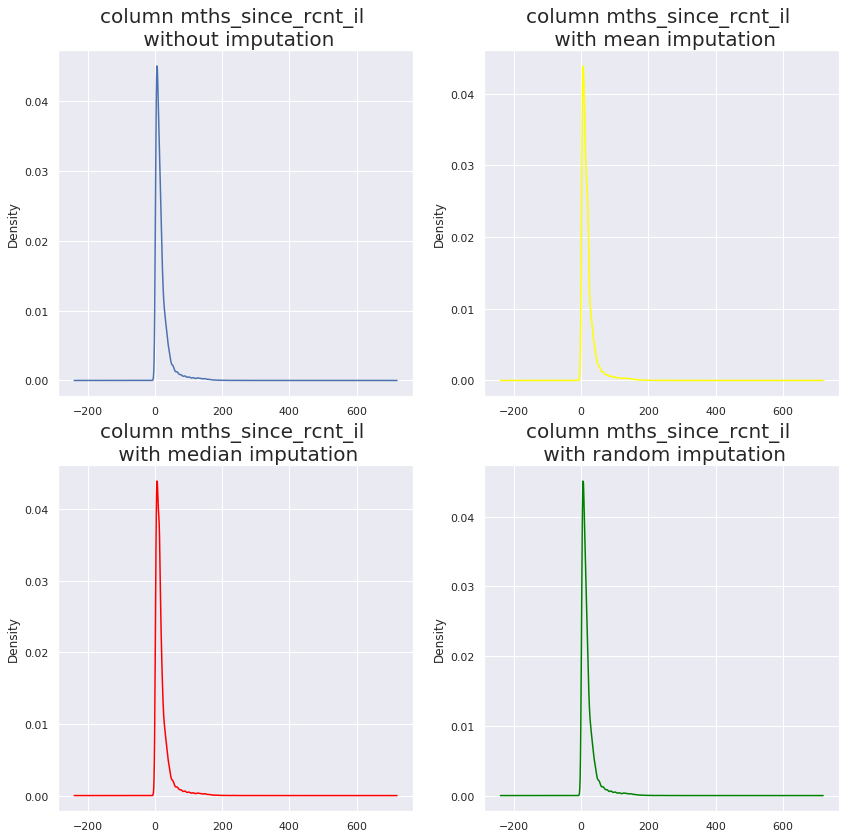

In [29]:
#3. plotting the data distruton of column mths_since_rcnt_il before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mths_since_rcnt_il_mean, mths_since_rcnt_il_median and  mths_since_rcnt_il_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['mths_since_rcnt_il'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column mths_since_rcnt_il \n without imputation", fontsize=20)
plot2 = loan_tmp.mths_since_rcnt_il_mean.plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column mths_since_rcnt_il \n with mean imputation", fontsize=20)
plot3 = loan_tmp.mths_since_rcnt_il_median.plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column mths_since_rcnt_il \n with median imputation", fontsize=20)
plot4 = loan_tmp.mths_since_rcnt_il_random.plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column mths_since_rcnt_il \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

In [30]:
#4. missing value treatment strategy for column bc_open_to_buy
loan_tmp= loan_all[['bc_open_to_buy']] 

In [32]:
##4. Call impute_na function for column bc_open_to_buy . This function creates 4 new additional variables
impute_na(loan_tmp, 'bc_open_to_buy')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [34]:
#4. standard variance of the data distribution of column bc_open_to_buy before and after imputation
# it is seen thah there is a  change in the variance after imputation except median imputation

print('Original Standard Deviation for column bc_open_to_buy: ', loan_tmp['bc_open_to_buy'].std())
print('Standard Deviation after median imputation for column bc_open_to_buy: ', loan_tmp['bc_open_to_buy_median'].std())
print('Standard Deviation after zero imputation for column bc_open_to_buy: ', loan_tmp['bc_open_to_buy_zero'].std())
print('Standard Deviation after random imputation for column bc_open_to_buy: ', loan_tmp['bc_open_to_buy_random'].std())
print('Standard Deviation after mean imputation for column bc_open_to_buy: ', loan_tmp['bc_open_to_buy_mean'].std())

Original Standard Deviation for column bc_open_to_buy:  20215.08848366523
Standard Deviation after median imputation for column bc_open_to_buy:  20112.21685361693
Standard Deviation after zero imputation for column bc_open_to_buy:  20173.75320224768
Standard Deviation after random imputation for column bc_open_to_buy:  20197.865750595003
Standard Deviation after mean imputation for column bc_open_to_buy:  20099.050246471208


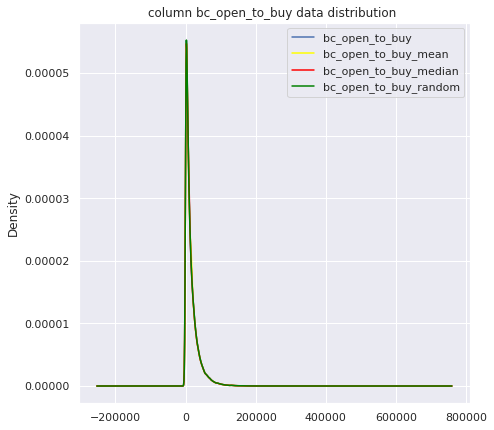

In [35]:
#4. plotting the data distruton of column bc_open_to_buy before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns bc_open_to_buy_mean, bc_open_to_buy_median and  bc_open_to_buy_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['bc_open_to_buy'].plot(kind='kde', ax=ax)
plot1 = loan_tmp['bc_open_to_buy_mean'].plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp['bc_open_to_buy_median'].plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp['bc_open_to_buy_random'].plot(kind='kde', ax=ax, color='green')
plot1.set_title("column bc_open_to_buy data distribution ")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column bc_open_to_buy \n with random imputation')

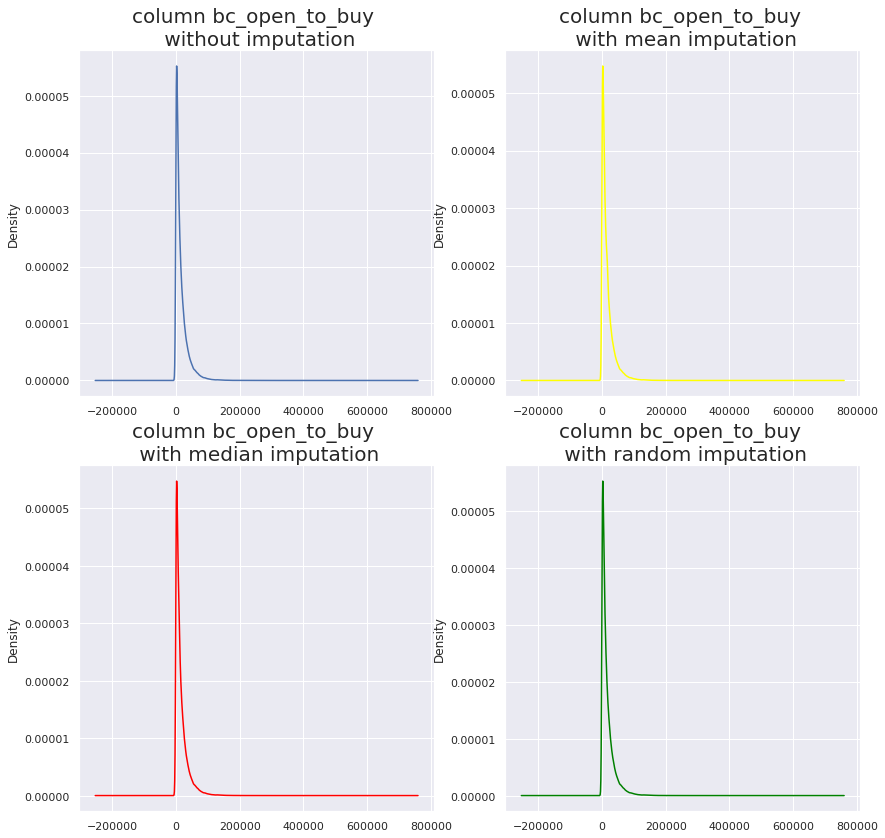

In [37]:
#4. plotting the data distruton of column bc_open_to_buy before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns bc_open_to_buy_mean, bc_open_to_buy_median and  bc_open_to_buy_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['bc_open_to_buy'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column bc_open_to_buy \n without imputation", fontsize=20)
plot2 = loan_tmp['bc_open_to_buy_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column bc_open_to_buy \n with mean imputation", fontsize=20)
plot3 = loan_tmp['bc_open_to_buy_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column bc_open_to_buy \n with median imputation", fontsize=20)
plot4 = loan_tmp['bc_open_to_buy_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column bc_open_to_buy \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

In [38]:
#5. missing value treatment strategy for column bc_util
loan_tmp= loan_all[['bc_util']] 

In [39]:
##5. Call impute_na function for column bc_open_to_buy . This function creates 4 new additional variables
impute_na(loan_tmp, 'bc_util')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [40]:
#5. standard variance of the data distribution of column bc_util before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation
print('Original Standard Deviation for column bc_util: ', loan_tmp['bc_util'].std())
print('Standard Deviation after median imputation for column bc_util: ', loan_tmp['bc_util_median'].std())
print('Standard Deviation after zero imputation for column bc_util: ', loan_tmp['bc_util_zero'].std())
print('Standard Deviation after random imputation for column bc_util: ', loan_tmp['bc_util_random'].std())
print('Standard Deviation after mean imputation for column bc_util: ', loan_tmp['bc_util_mean'].std())

Original Standard Deviation for column bc_util:  28.542654724407956
Standard Deviation after median imputation for column bc_util:  28.372343651731377
Standard Deviation after zero imputation for column bc_util:  28.88265973691006
Standard Deviation after random imputation for column bc_util:  28.54548898077651
Standard Deviation after mean imputation for column bc_util:  28.371983092900095


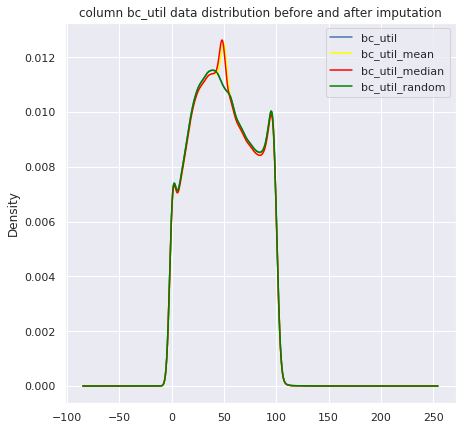

In [41]:
#5. plotting the data distruton of column bc_util before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns bc_util_mean, bc_util_median and  bc_util_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['bc_util'].plot(kind='kde', ax=ax)
plot1 = loan_tmp['bc_util_mean'].plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp['bc_util_median'].plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp['bc_util_random'].plot(kind='kde', ax=ax, color='green')
plot1.set_title("column bc_util data distribution before and after imputation")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column bc_util \n with random imputation')

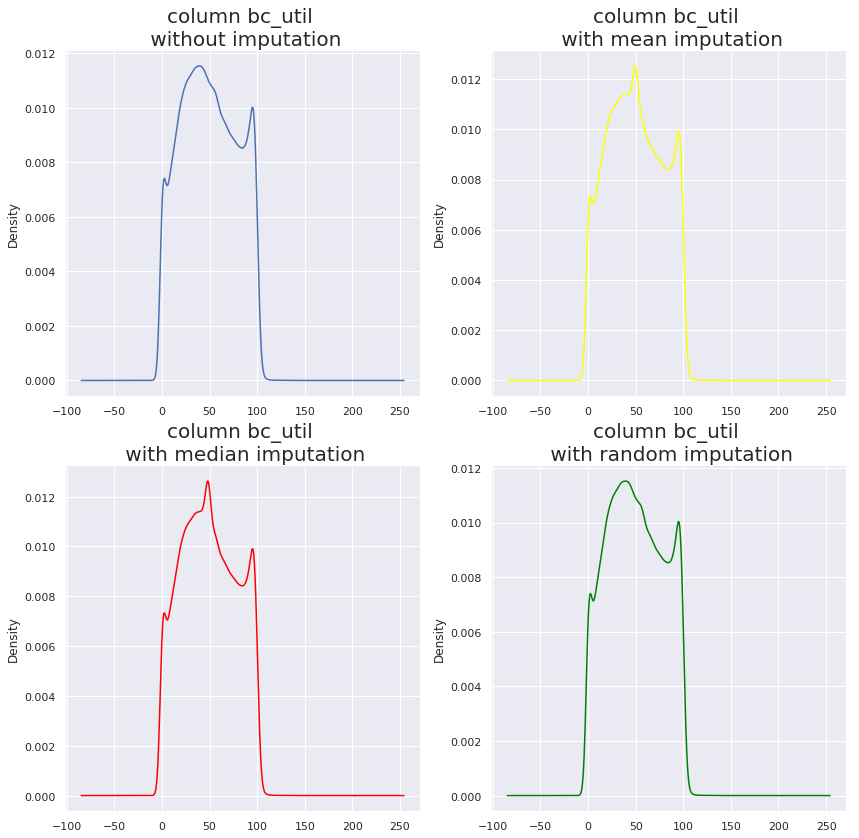

In [42]:
#5. plotting the data distruton of column bc_util before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns bc_util_mean, bc_util_median and  bc_util_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['bc_util'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column bc_util \n without imputation", fontsize=20)
plot2 = loan_tmp['bc_util_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column bc_util \n with mean imputation", fontsize=20)
plot3 = loan_tmp['bc_util_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column bc_util \n with median imputation", fontsize=20)
plot4 = loan_tmp['bc_util_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column bc_util \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

In [43]:
#6. missing value treatment strategy for column mo_sin_old_il_acct
loan_tmp= loan_all[['mo_sin_old_il_acct']] 

In [44]:
##6. Call impute_na function for column bc_open_to_buy . This function creates 4 new additional variables
impute_na(loan_tmp, 'mo_sin_old_il_acct')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [46]:
#6. standard variance of the data distribution of column mo_sin_old_il_acct before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation
print('Original Standard Deviation for column mo_sin_old_il_acct: ', loan_tmp['mo_sin_old_il_acct'].std())
print('Standard Deviation after median imputation for column mo_sin_old_il_acct: ', loan_tmp['mo_sin_old_il_acct_median'].std())
print('Standard Deviation after zero imputation for column mo_sin_old_il_acct: ', loan_tmp['mo_sin_old_il_acct_zero'].std())
print('Standard Deviation after random imputation for column mo_sin_old_il_acct: ', loan_tmp['mo_sin_old_il_acct_random'].std())
print('Standard Deviation after mean imputation for column mo_sin_old_il_acct: ', loan_tmp['mo_sin_old_il_acct_mean'].std())

Original Standard Deviation for column mo_sin_old_il_acct:  56.722876185207035
Standard Deviation after median imputation for column mo_sin_old_il_acct:  55.86711804335932
Standard Deviation after zero imputation for column mo_sin_old_il_acct:  59.84031886618132
Standard Deviation after random imputation for column mo_sin_old_il_acct:  56.72977443901931
Standard Deviation after mean imputation for column mo_sin_old_il_acct:  55.85462963566041


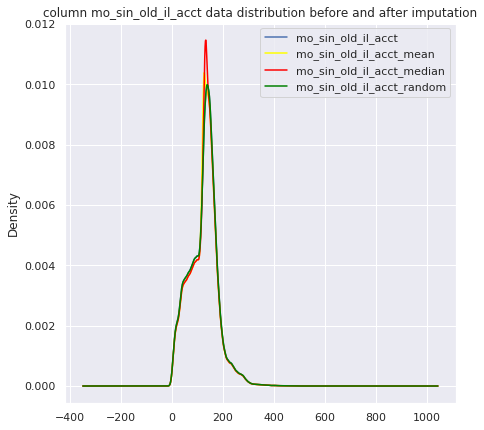

In [47]:
#6. plotting the data distruton of column mo_sin_old_il_acct before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mo_sin_old_il_acct_mean, mo_sin_old_il_acct_median and  mo_sin_old_il_acct_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['mo_sin_old_il_acct'].plot(kind='kde', ax=ax)
plot1 = loan_tmp['mo_sin_old_il_acct_mean'].plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp['mo_sin_old_il_acct_median'].plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp['mo_sin_old_il_acct_random'].plot(kind='kde', ax=ax, color='green')
plot1.set_title("column mo_sin_old_il_acct data distribution before and after imputation")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


Text(0.5,1,'column mo_sin_old_il_acct \n with random imputation')

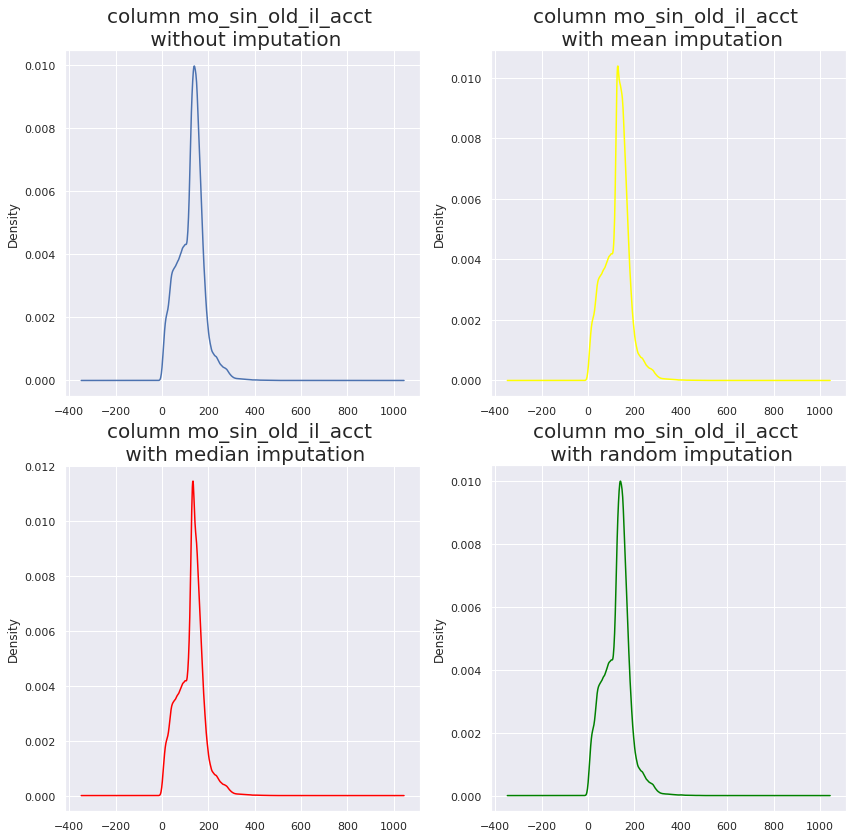

In [48]:
#6. plotting the data distruton of column mo_sin_old_il_acct before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mo_sin_old_il_acct_mean, mo_sin_old_il_acct_median and  mo_sin_old_il_acct_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['mo_sin_old_il_acct'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column mo_sin_old_il_acct \n without imputation", fontsize=20)
plot2 = loan_tmp['mo_sin_old_il_acct_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column mo_sin_old_il_acct \n with mean imputation", fontsize=20)
plot3 = loan_tmp['mo_sin_old_il_acct_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column mo_sin_old_il_acct \n with median imputation", fontsize=20)
plot4 = loan_tmp['mo_sin_old_il_acct_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column mo_sin_old_il_acct \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

In [49]:
#7. missing value treatment strategy for column mths_since_recent_bc
loan_tmp= loan_all[['mths_since_recent_bc']] 

In [50]:
##7. Call impute_na function for column bc_open_to_buy . This function creates 4 new additional variables
impute_na(loan_tmp, 'mths_since_recent_bc')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [51]:
#7. standard variance of the data distribution of column mths_since_recent_bc before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation
print('Original Standard Deviation for column mths_since_recent_bc: ', loan_tmp['mths_since_recent_bc'].std())
print('Standard Deviation after median imputation for column mths_since_recent_bc: ', loan_tmp['mths_since_recent_bc_median'].std())
print('Standard Deviation after zero imputation for column mths_since_recent_bc: ', loan_tmp['mths_since_recent_bc_zero'].std())
print('Standard Deviation after random imputation for column mths_since_recent_bc: ', loan_tmp['mths_since_recent_bc_random'].std())
print('Standard Deviation after mean imputation for column mths_since_recent_bc: ', loan_tmp['mths_since_recent_bc_mean'].std())


Original Standard Deviation for column mths_since_recent_bc:  34.079231869078086
Standard Deviation after median imputation for column mths_since_recent_bc:  33.91299943037039
Standard Deviation after zero imputation for column mths_since_recent_bc:  34.00171129564748
Standard Deviation after random imputation for column mths_since_recent_bc:  34.05849841397877
Standard Deviation after mean imputation for column mths_since_recent_bc:  33.893248337519644


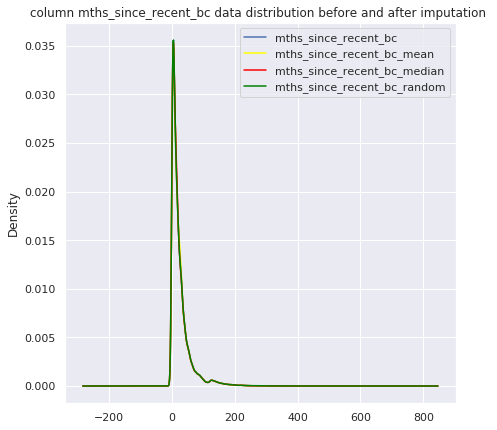

In [52]:
#7. plotting the data distruton of column mths_since_recent_bc before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mths_since_recent_bc_mean, mths_since_recent_bc_median and  mths_since_recent_bc_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['mths_since_recent_bc'].plot(kind='kde', ax=ax)
plot1 = loan_tmp['mths_since_recent_bc_mean'].plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp['mths_since_recent_bc_median'].plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp['mths_since_recent_bc_random'].plot(kind='kde', ax=ax, color='green')
plot1.set_title("column mths_since_recent_bc data distribution before and after imputation ")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column mths_since_recent_bc \n with random imputation')

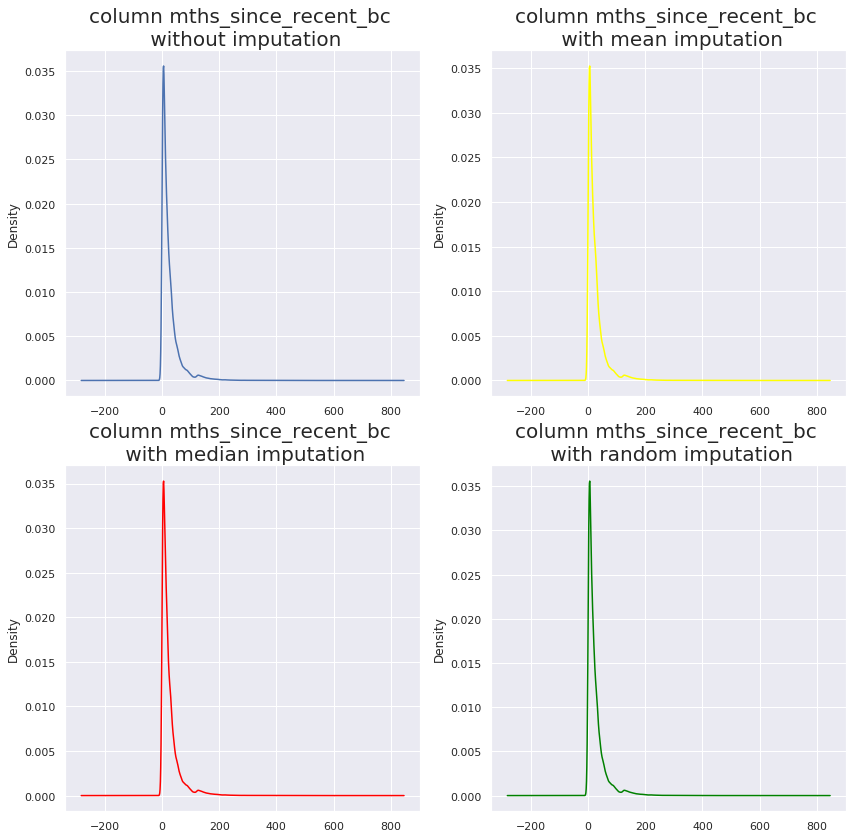

In [53]:
#7. plotting the data distruton of column mths_since_recent_bc before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns mths_since_recent_bc_mean, mths_since_recent_bc_median and  mths_since_recent_bc_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['mths_since_recent_bc'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column mths_since_recent_bc \n without imputation", fontsize=20)
plot2 = loan_tmp['mths_since_recent_bc_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column mths_since_recent_bc \n with mean imputation", fontsize=20)
plot3 = loan_tmp['mths_since_recent_bc_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column mths_since_recent_bc \n with median imputation", fontsize=20)
plot4 = loan_tmp['mths_since_recent_bc_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column mths_since_recent_bc \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')


In [56]:
#9. missing value treatment strategy for column percent_bc_gt_75
loan_tmp= loan_all[['percent_bc_gt_75']] 

In [57]:
##9. Call impute_na function for column percent_bc_gt_75 . This function creates 4 new additional variables
impute_na(loan_tmp, 'percent_bc_gt_75')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [59]:
#9. standard variance of the data distribution of column percent_bc_gt_75 before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation
print('Original Standard Deviation for column percent_bc_gt_75: ', loan_tmp['percent_bc_gt_75'].std())
print('Standard Deviation after median imputation for column percent_bc_gt_75: ', loan_tmp['percent_bc_gt_75_median'].std())
print('Standard Deviation after zero imputation for column percent_bc_gt_75: ', loan_tmp['percent_bc_gt_75_zero'].std())
print('Standard Deviation after random imputation for column percent_bc_gt_75: ', loan_tmp['percent_bc_gt_75_random'].std())
print('Standard Deviation after mean imputation for column percent_bc_gt_75: ', loan_tmp['percent_bc_gt_75_mean'].std())

Original Standard Deviation for column percent_bc_gt_75:  34.46424584099186
Standard Deviation after median imputation for column percent_bc_gt_75:  34.27512013494153
Standard Deviation after zero imputation for column percent_bc_gt_75:  34.44145198895094
Standard Deviation after random imputation for column percent_bc_gt_75:  34.461494937262074
Standard Deviation after mean imputation for column percent_bc_gt_75:  34.26551508809755


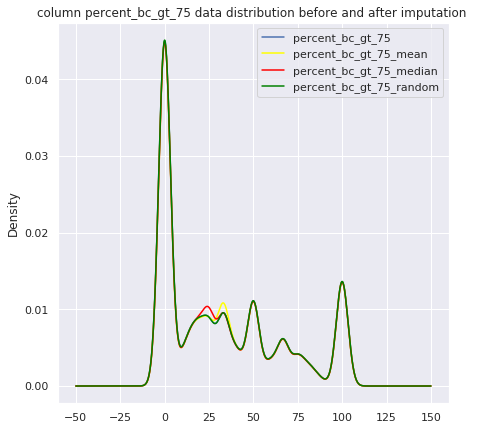

In [60]:
#9. plotting the data distruton of column percent_bc_gt_75 before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column percent_bc_gt_75 are applied. 
# columns percent_bc_gt_75_mean, percent_bc_gt_75_median and  percent_bc_gt_75_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['percent_bc_gt_75'].plot(kind='kde', ax=ax)
plot1 = loan_tmp['percent_bc_gt_75_mean'].plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp['percent_bc_gt_75_median'].plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp['percent_bc_gt_75_random'].plot(kind='kde', ax=ax, color='green')
plot1.set_title("column percent_bc_gt_75 data distribution before and after imputation ")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column percent_bc_gt_75 \n with random imputation')

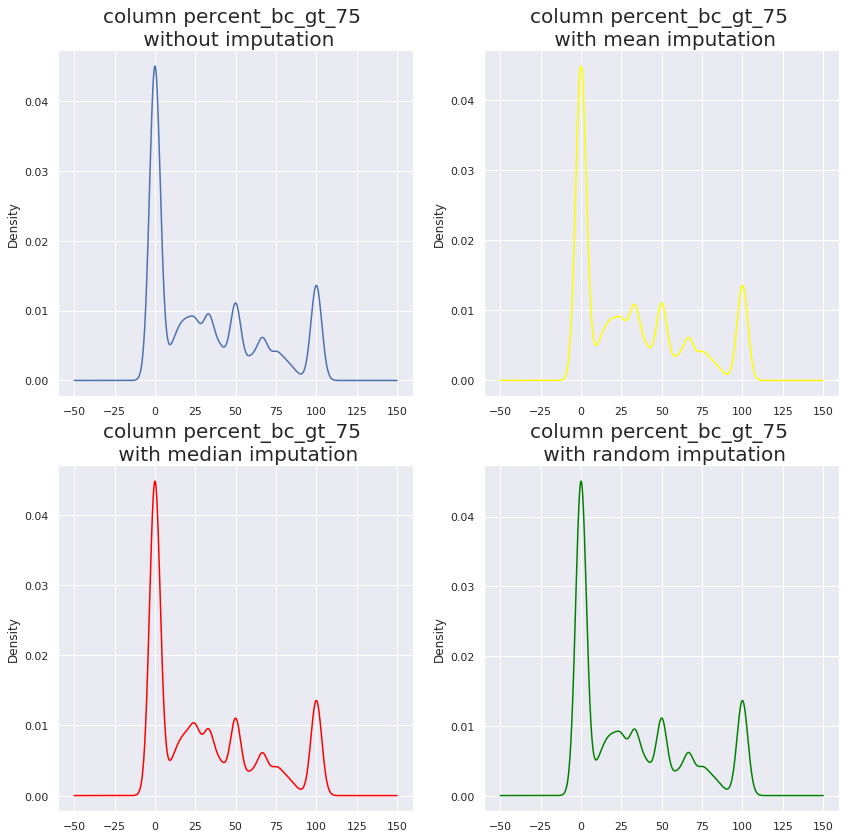

In [61]:
#9. plotting the data distruton of column percent_bc_gt_75 before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column percent_bc_gt_75 are applied. 
# columns percent_bc_gt_75_mean, percent_bc_gt_75_median and  percent_bc_gt_75_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['percent_bc_gt_75'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column percent_bc_gt_75 \n without imputation", fontsize=20)
plot2 = loan_tmp['percent_bc_gt_75_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column percent_bc_gt_75 \n with mean imputation", fontsize=20)
plot3 = loan_tmp['percent_bc_gt_75_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column percent_bc_gt_75 \n with median imputation", fontsize=20)
plot4 = loan_tmp['percent_bc_gt_75_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column percent_bc_gt_75 \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')




In [62]:
#10. missing value treatment strategy for dti
loan_tmp= loan_all[['dti']] 

In [63]:
##10 Call impute_na function. This function creates 4 new additional variables
impute_na(loan_tmp, 'dti')


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [323]:
#10 standard variance of the data distribution of column dti before and after imputation
# it is seen thah there is sligh  change in the variance after imputation except random imputation 


print('Original Standard Deviation for column dti: ', loan_tmp['dti'].std())
print('Standard Deviation after median imputation for column dti: ', loan_tmp['dti_median'].std())
print('Standard Deviation after zero imputation for column dti: ', loan_tmp['dti_zero'].std())
print('Standard Deviation after random imputation for column dti: ', loan_tmp['dti_random'].std())
print('Standard Deviation after mean imputation for column dti: ', loan_tmp['dti_mean'].std())

Original Standard Deviation for column dti:  20.486842149014787
Standard Deviation after median imputation for column dti:  20.464260292285342
Standard Deviation after zero imputation for column dti:  20.486698954834797
Standard Deviation after random imputation for column dti:  20.481383853953336
Standard Deviation after mean imputation for column dti:  20.464050950752135


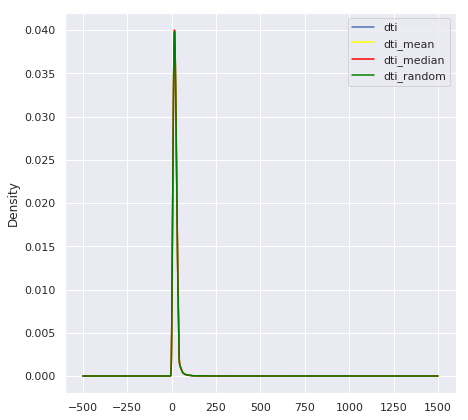

In [64]:
#10. plotting the data distruton of column dti before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column dti are applied. 
# columns il_util_mean, il_util_median and  il_util_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
loan_tmp['dti'].plot(kind='kde', ax=ax)
loan_tmp.dti_mean.plot(kind='kde', ax=ax, color='yellow')
loan_tmp.dti_median.plot(kind='kde', ax=ax, color='red')
loan_tmp.dti_random.plot(kind='kde', ax=ax, color='green')
plot1.set_title("column dti data distribution before and after imputation ")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column dti \n with random imputation')

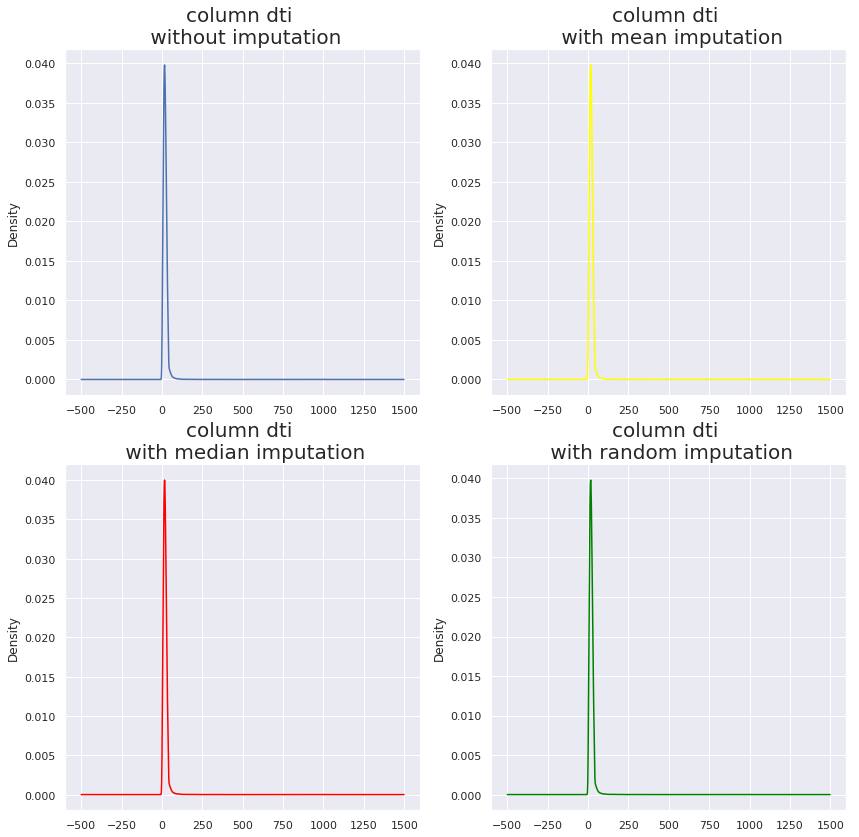

In [65]:
#10. plotting the data distruton of column dti before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column dti are applied. 
# columns dti_mean, dti_median and  dti_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['dti'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column dti \n without imputation", fontsize=20)
plot2 = loan_tmp['dti_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column dti \n with mean imputation", fontsize=20)
plot3 = loan_tmp['dti_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column dti \n with median imputation", fontsize=20)
plot4 = loan_tmp['dti_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column dti \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')


In [66]:
#11. missing value treatment strategy for column all_util
loan_tmp= loan_all[['all_util']] 

In [67]:
##11. Call impute_na function for column all_util . This function creates 4 new additional variables
impute_na(loan_tmp, 'all_util')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [68]:
#11. standard variance of the data distribution of column all_util before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation
print('Original Standard Deviation for column all_util: ', loan_tmp['all_util'].std())
print('Standard Deviation after median imputation for column all_util: ', loan_tmp['all_util_median'].std())
print('Standard Deviation after zero imputation for column all_util: ', loan_tmp['all_util_zero'].std())
print('Standard Deviation after random imputation for column all_util: ', loan_tmp['all_util_random'].std())
print('Standard Deviation after mean imputation for column all_util: ', loan_tmp['all_util_mean'].std())

Original Standard Deviation for column all_util:  20.367414626839853
Standard Deviation after median imputation for column all_util:  20.36530288928519
Standard Deviation after zero imputation for column all_util:  20.380276270534452
Standard Deviation after random imputation for column all_util:  20.367474760933213
Standard Deviation after mean imputation for column all_util:  20.36529974031457


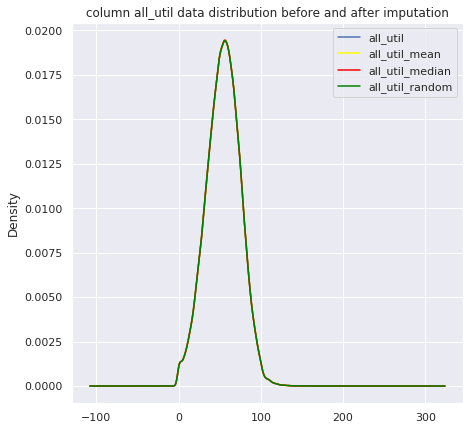

In [69]:
#11. plotting the data distruton of column all_util before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column all_util are applied. 
# columns all_util_mean, all_util_median and  all_util_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['all_util'].plot(kind='kde', ax=ax)
plot1 = loan_tmp['all_util_mean'].plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp['all_util_median'].plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp['all_util_random'].plot(kind='kde', ax=ax, color='green')
plot1.set_title("column all_util data distribution before and after imputation")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column all_util \n with random imputation')

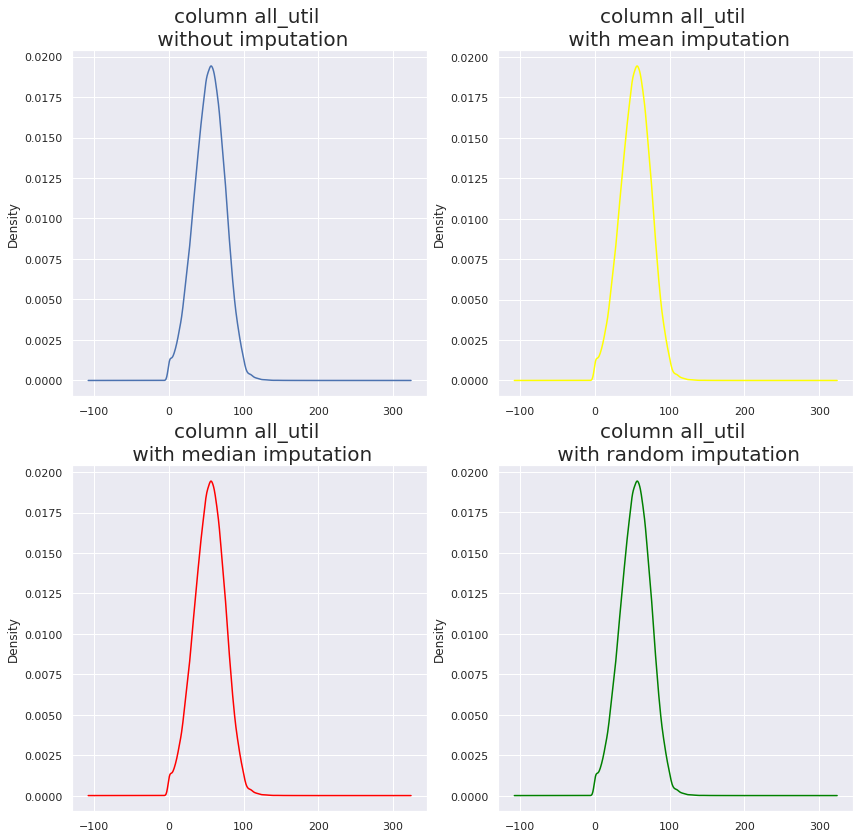

In [70]:
#11. plotting the data distruton of column all_util before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column il_util are applied. 
# columns all_util_mean, all_util_median and  all_util_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['all_util'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column all_util \n without imputation", fontsize=20)
plot2 = loan_tmp['all_util_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column all_util \n with mean imputation", fontsize=20)
plot3 = loan_tmp['all_util_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column all_util \n with median imputation", fontsize=20)
plot4 = loan_tmp['all_util_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column all_util \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

In [71]:
#12. missing value treatment strategy for column avg_cur_bal
loan_tmp= loan_all[['avg_cur_bal']] 

In [72]:
##12. Call impute_na function for column avg_cur_bal . This function creates 4 new additional variables
impute_na(loan_tmp, 'avg_cur_bal')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [73]:
#12. standard variance of the data distribution of column avg_cur_bal before and after imputation
# it is seen thah there is a  change in the variance after imputation except random imputation
print('Original Standard Deviation for column avg_cur_bal: ', loan_tmp['avg_cur_bal'].std())
print('Standard Deviation after median imputation for column avg_cur_bal: ', loan_tmp['avg_cur_bal_median'].std())
print('Standard Deviation after zero imputation for column avg_cur_bal: ', loan_tmp['avg_cur_bal_zero'].std())
print('Standard Deviation after random imputation for column avg_cur_bal: ', loan_tmp['avg_cur_bal_random'].std())
print('Standard Deviation after mean imputation for column avg_cur_bal: ', loan_tmp['avg_cur_bal_mean'].std())


Original Standard Deviation for column avg_cur_bal:  17727.854998049093
Standard Deviation after median imputation for column avg_cur_bal:  17727.393261005214
Standard Deviation after zero imputation for column avg_cur_bal:  17727.667842842715
Standard Deviation after random imputation for column avg_cur_bal:  17727.542671898587
Standard Deviation after mean imputation for column avg_cur_bal:  17727.318116866372


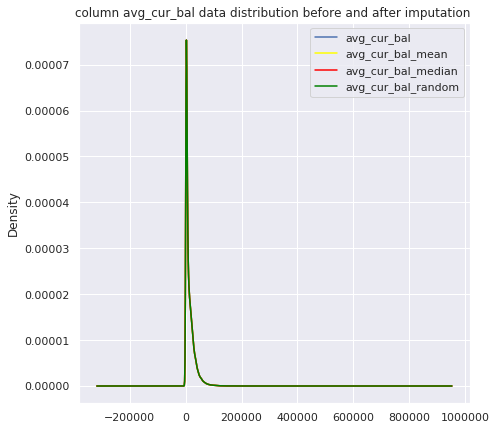

In [74]:
#12. plotting the data distruton of column avg_cur_bal before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column avg_cur_bal are applied. 
# columns avg_cur_bal_mean, avg_cur_bal_median and  avg_cur_bal_random are the derived columns after imputing the original column data
# with mean, median and random
#all the columns are plotted in a single plot.
sns.set(rc={'figure.figsize':(7,7)})
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = loan_tmp['avg_cur_bal'].plot(kind='kde', ax=ax)
plot1 = loan_tmp['avg_cur_bal_mean'].plot(kind='kde', ax=ax, color='yellow')
plot1 = loan_tmp['avg_cur_bal_median'].plot(kind='kde', ax=ax, color='red')
plot1 = loan_tmp['avg_cur_bal_random'].plot(kind='kde', ax=ax, color='green')
plot1.set_title("column avg_cur_bal data distribution before and after imputation ")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(0.5,1,'column avg_cur_bal \n with random imputation')

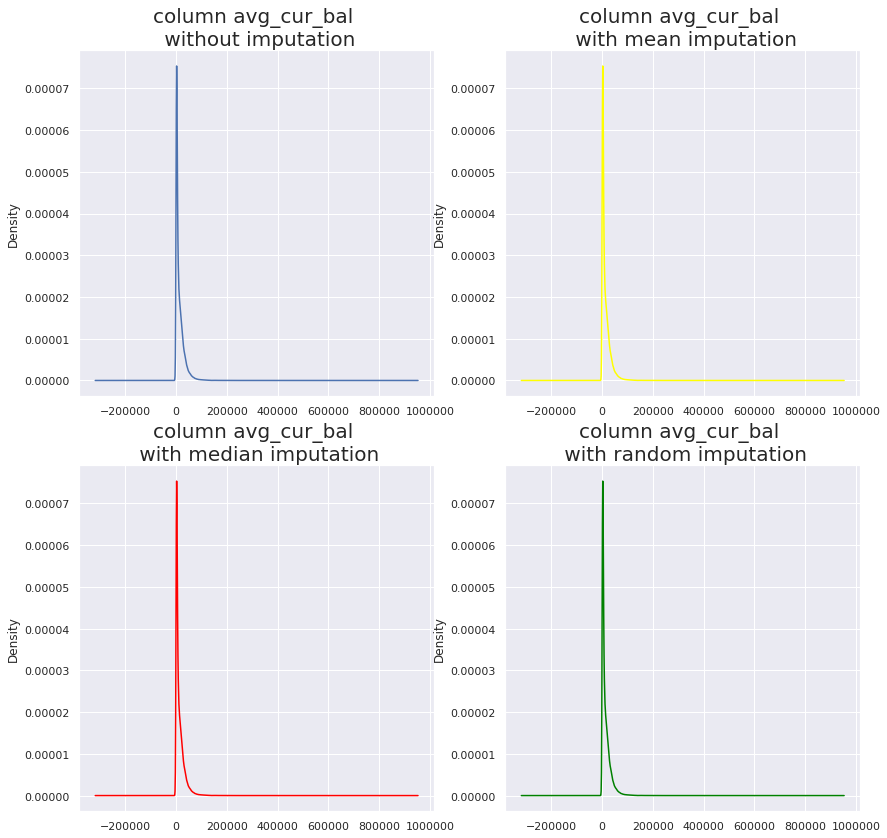

In [76]:
#12. plotting the data distruton of column avg_cur_bal before and after imputation. 
# Before selecting the actual imputation strategy, three imputation strategies (mean, median and random ) for column avg_cur_bal are applied. 
# columns avg_cur_bal_mean, avg_cur_bal_median and  avg_cur_bal_random are the derived columns after imputing the original column data
# with mean, median and random
sns.set(rc={'figure.figsize':(14,14)})
fig, ax =plt.subplots(2,2)
plot1 = loan_tmp['avg_cur_bal'].plot(kind='kde', ax=ax[0][0])
plot1.set_title("column avg_cur_bal \n without imputation", fontsize=20)
plot2 = loan_tmp['avg_cur_bal_mean'].plot(kind='kde', ax=ax[0][1], color='yellow')
plot2.set_title("column avg_cur_bal \n with mean imputation", fontsize=20)
plot3 = loan_tmp['avg_cur_bal_median'].plot(kind='kde',  ax=ax[1][0], color='red')
plot3.set_title("column avg_cur_bal \n with median imputation", fontsize=20)
plot4 = loan_tmp['avg_cur_bal_random'].plot(kind='kde',  ax=ax[1][1], color='green')
plot4.set_title("column avg_cur_bal \n with random imputation", fontsize=20)
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

In [ ]:
#missing value treatement for categorical variables

In [32]:
#13.  emp_title - categorical variable - missing value analysis
loan_emp_title = loan_all[['emp_title','good_loan']]
loan_emp_title_good_loan = loan_emp_title[loan_emp_title['good_loan']==1]
loan_emp_title_bad_loan = loan_emp_title[loan_emp_title['good_loan']==0]


In [33]:
#13. highest occurence  label for column  emp_title against the target column good_loan value 1
loan_emp_title_good_loan_group_by = loan_emp_title_good_loan.groupby(['emp_title']).agg({'emp_title': 'count'})
loan_emp_title_good_loan_group_by = loan_emp_title_good_loan_group_by.rename_axis(None)
loan_emp_title_good_loan_group_by = loan_emp_title_good_loan_group_by.sort_values(by='emp_title', ascending=False)

In [34]:
loan_emp_title_good_loan_group_by.head()

,emp_title
Teacher,1917
Manager,1497
Registered Nurse,859
Driver,779
Supervisor,601


In [35]:
#13. highest occurence  label for column  emp_title against the target column good_loan value 0
loan_emp_title_bad_loan_group_by = loan_emp_title_bad_loan.groupby(['emp_title']).agg({'emp_title': 'count'})
loan_emp_title_bad_loan_group_by = loan_emp_title_bad_loan_group_by.rename_axis(None)
loan_emp_title_bad_loan_group_by = loan_emp_title_bad_loan_group_by.sort_values(by='emp_title', ascending=False)

In [36]:
loan_emp_title_bad_loan_group_by.head()

,emp_title
Manager,128
Teacher,118
Driver,78
Supervisor,54
Owner,42


In [37]:
#13 emp_title imputation with highest label occurance value against each target level (good_loan: 1 and 0)
loan_emp_title['emp_title'] = loan_emp_title.apply(
    lambda row: ('Teacher' if(row['good_loan'] == 1) else 'Manager') if pd.isnull(row['emp_title']) else row['emp_title'],
    axis=1
)

C:\Users\aniljain\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
#13 check the  distribution for column emp_title after imputation
loan_emp_title_group_by = loan_emp_title.groupby(['emp_title']).agg({'emp_title': 'count'})
loan_emp_title_group_by = loan_emp_title_group_by.rename_axis(None)
loan_emp_title_group_by = loan_emp_title_group_by.sort_values(by='emp_title', ascending=False)

In [31]:
loan_emp_title_group_by.head(20)


,emp_title
Teacher,19929
Manager,3233
Registered Nurse,896
Driver,857
Supervisor,655
RN,623
Sales,586
Office Manager,574
Project Manager,540
General Manager,485


In [91]:
#13. total NaN in emp_title
loan_all[['emp_title']].isnull().sum()

emp_title    19502
dtype: int64

In [92]:
#13. total missing percentage in emp_title
loan_all[['emp_title']].isnull().sum()/len(loan_all.index)

emp_title    0.168742
dtype: float64

In [46]:
#14.  next_pymnt_d - categorical variable - missing value analysis
loan_next_pymnt_d = loan_all[['next_pymnt_d','good_loan']]
loan_next_pymnt_d_good_loan = loan_next_pymnt_d[loan_emp_title['good_loan']==1]
loan_next_pymnt_d_bad_loan = loan_next_pymnt_d[loan_emp_title['good_loan']==0]

In [47]:
#14. highest occurence  label for column  next_pymnt_d against the target column good_loan value 1
loan_next_pymnt_d_good_loan_group_by = loan_next_pymnt_d_good_loan.groupby(['next_pymnt_d']).agg({'next_pymnt_d': 'count'})
loan_next_pymnt_d_good_loan_group_by = loan_next_pymnt_d_good_loan_group_by.rename_axis(None)
loan_next_pymnt_d_good_loan_group_by = loan_next_pymnt_d_good_loan_group_by.sort_values(by='next_pymnt_d', ascending=False)


In [48]:
loan_next_pymnt_d_good_loan_group_by.head()

,next_pymnt_d
Mar-2020,90945
Feb-2020,199
Apr-2020,4


In [49]:
#14. highest occurence  label for column  next_pymnt_d against the target column good_loan value 0
loan_next_pymnt_d_bad_loan_group_by = loan_next_pymnt_d_bad_loan.groupby(['next_pymnt_d']).agg({'next_pymnt_d': 'count'})
loan_next_pymnt_d_bad_loan_group_by = loan_next_pymnt_d_bad_loan_group_by.rename_axis(None)
loan_next_pymnt_d_bad_loan_group_by = loan_next_pymnt_d_bad_loan_group_by.sort_values(by='next_pymnt_d', ascending=False)

In [50]:
#2.loan_next_pymnt_d_bad_loan_group_by.head()

,next_pymnt_d
Mar-2020,3687
Feb-2020,4
Apr-2020,1


In [51]:
#14. next_pymnt_d imputation with highest label occurance value against each target level (good_loan: 1 and 0)
loan_next_pymnt_d['next_pymnt_d'] = loan_next_pymnt_d['next_pymnt_d'].fillna('Mar-2020') 


C:\Users\aniljain\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
#15.  emp_length - categorical variable - missing value analysis
loan_emp_length = loan_all[['emp_length','good_loan']]
loan_emp_length_good_loan = loan_emp_length[loan_emp_title['good_loan']==1]
loan_emp_length_bad_loan = loan_emp_length[loan_emp_title['good_loan']==0]

In [55]:
#315. highest occurence  label for column  emp_length against the target column good_loan value 1
loan_emp_length_good_loan_group_by = loan_emp_length_good_loan.groupby(['emp_length']).agg({'emp_length': 'count'})
loan_emp_length_good_loan_group_by = loan_emp_length_good_loan_group_by.rename_axis(None)
loan_emp_length_good_loan_group_by = loan_emp_length_good_loan_group_by.sort_values(by='emp_length', ascending=False)


In [57]:
loan_emp_length_good_loan_group_by.head()

,emp_length
10+ years,32433
< 1 year,13915
2 years,9043
3 years,8112
1 year,7390


In [59]:
#15. highest occurence  label for column  next_pymnt_d against the target column good_loan value 0
loan_emp_length_bad_loan_group_by = loan_emp_length_bad_loan.groupby(['emp_length']).agg({'emp_length': 'count'})
loan_emp_length_bad_loan_group_by = loan_emp_length_bad_loan_group_by.rename_axis(None)
loan_emp_length_bad_loan_group_by = loan_emp_length_bad_loan_group_by.sort_values(by='emp_length', ascending=False)

In [60]:
loan_emp_length_bad_loan_group_by.head()

,emp_length
10+ years,2028
< 1 year,1115
2 years,645
3 years,598
1 year,525


In [ ]:
#15. emp_length imputation with highest label occurance value against each target level (good_loan: 1 and 0)
loan_emp_length['emp_length'] = loan_emp_length['emp_length'].fillna('10+ years')

In [41]:
#16 revol_util - categorical variable - missing value analysis
loan_revol_util = loan_all[['revol_util','good_loan']]
loan_revol_util_good_loan = loan_revol_util[loan_revol_util['good_loan']==1]
loan_revol_util_bad_loan = loan_revol_util[loan_revol_util['good_loan']==0]

In [42]:
#16. highest occurence  label for column  revol_util against the target column good_loan value 1
loan_revol_util_good_loan_group_by = loan_revol_util_good_loan.groupby(['revol_util']).agg({'revol_util': 'count'})
loan_revol_util_good_loan_group_by = loan_revol_util_good_loan_group_by.rename_axis(None)
loan_revol_util_good_loan_group_by = loan_revol_util_good_loan_group_by.sort_values(by='revol_util', ascending=False)

In [43]:
loan_revol_util_good_loan_group_by.head()

,revol_util
0%,946
45%,204
38%,197
43%,195
32.4%,191


In [44]:
#16. highest occurence  label for column  next_pymnt_d against the target column good_loan value 0
loan_revol_util_bad_loan_group_by = loan_revol_util_bad_loan.groupby(['revol_util']).agg({'revol_util': 'count'})
loan_revol_util_bad_loan_group_by = loan_revol_util_bad_loan_group_by.rename_axis(None)
loan_revol_util_bad_loan_group_by = loan_revol_util_bad_loan_group_by.sort_values(by='revol_util', ascending=False)

In [45]:
loan_revol_util_bad_loan_group_by.head()

,revol_util
0%,106
50%,22
30.9%,20
63.6%,19
58%,19


In [46]:
#16. revol_util imputation with highest label occurance value against each target level (good_loan: 1 and 0) 
loan_revol_util['revol_util'] = loan_revol_util['revol_util'].fillna('0%')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
#17 revol_util - categorical variable - missing value analysis
loan_last_pymnt_d = loan_all[['last_pymnt_d','good_loan']]
loan_last_pymnt_d_good_loan = loan_last_pymnt_d[loan_last_pymnt_d['good_loan']==1]
loan_last_pymnt_d_bad_loan = loan_last_pymnt_d[loan_last_pymnt_d['good_loan']==0]

In [58]:
loan_last_pymnt_d_good_loan.head()

,last_pymnt_d,good_loan
0,Feb-2020,1
1,Feb-2020,1
2,Feb-2020,1
3,Feb-2020,1
4,Feb-2020,1


In [131]:
#17. highest occurence  label for column  revol_util against the target column good_loan value 1
loan_last_pymnt_d_good_loan_group_by = loan_last_pymnt_d_good_loan.groupby(['last_pymnt_d']).agg({'last_pymnt_d': 'count'})
loan_last_pymnt_d_good_loan_group_by = loan_last_pymnt_d_good_loan_group_by.rename_axis(None)
loan_last_pymnt_d_good_loan_group_by = loan_last_pymnt_d_good_loan_group_by.sort_values(by='last_pymnt_d', ascending=False)


In [132]:
loan_last_pymnt_d_good_loan_group_by.head()

,last_pymnt_d
Feb-2020,91169
Jan-2020,1878
Dec-2019,1637
Jul-2019,1633
Oct-2019,1612


In [133]:
#17. highest occurence  label for column  next_pymnt_d against the target column good_loan value 0
loan_last_pymnt_d_bad_loan_group_by = loan_last_pymnt_d_bad_loan.groupby(['last_pymnt_d']).agg({'last_pymnt_d': 'count'})
loan_last_pymnt_d_bad_loan_group_by = loan_last_pymnt_d_bad_loan_group_by.rename_axis(None)
loan_last_pymnt_d_bad_loan_group_by = loan_last_pymnt_d_bad_loan_group_by.sort_values(by='last_pymnt_d', ascending=False)


In [134]:
loan_last_pymnt_d_bad_loan_group_by.head()

,last_pymnt_d
Feb-2020,1251
Jan-2020,798
Dec-2019,692
Sep-2019,632
Jul-2019,622


In [63]:
#17. last_pymnt_d imputation with highest label occurance value against each target level (good_loan: 1 and 0) 
loan_last_pymnt_d['last_pymnt_d'] = loan_last_pymnt_d['last_pymnt_d'].fillna('Feb-2020')

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [137]:
#18 last_credit_pull_d - categorical variable - missing value analysis
loan_last_credit_pull_d = loan_all[['last_credit_pull_d','good_loan']]
loan_last_credit_pull_d_good_loan = loan_last_credit_pull_d[loan_revol_util['good_loan']==1]
loan_last_credit_pull_d_bad_loan = loan_last_credit_pull_d[loan_revol_util['good_loan']==0]

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [139]:
#18. highest occurence  label for column  revol_util against the target column good_loan value 1
loan_last_credit_pull_d_good_loan_group_by = loan_last_credit_pull_d_good_loan.groupby(['last_credit_pull_d']).agg({'last_credit_pull_d': 'count'})
loan_last_credit_pull_d_good_loan_group_by = loan_last_credit_pull_d_good_loan_group_by.rename_axis(None)
loan_last_credit_pull_d_good_loan_group_by = loan_last_credit_pull_d_good_loan_group_by.sort_values(by='last_credit_pull_d', ascending=False)


In [140]:
loan_last_credit_pull_d_good_loan_group_by.head()

,last_credit_pull_d
Jan-2020,86335
Feb-2020,12367
Nov-2019,2149
Oct-2019,1157
Sep-2019,1024


In [141]:
#18. highest occurence  label for column  revol_util against the target column good_loan value 0
loan_last_credit_pull_d_bad_loan_group_by = loan_last_credit_pull_d_bad_loan.groupby(['last_credit_pull_d']).agg({'last_credit_pull_d': 'count'})
loan_last_credit_pull_d_bad_loan_group_by = loan_last_credit_pull_d_bad_loan_group_by.rename_axis(None)
loan_last_credit_pull_d_bad_loan_group_by = loan_last_credit_pull_d_bad_loan_group_by.sort_values(by='last_credit_pull_d', ascending=False)



In [142]:
loan_last_credit_pull_d_bad_loan_group_by.head()

,last_credit_pull_d
Jan-2020,6375
Nov-2019,470
Oct-2019,210
Sep-2019,119
Feb-2020,109


In [117]:
loan_all['last_credit_pull_d'].isnull().sum()

2

In [322]:
#display only those columns having NaN values
loan_all.columns[loan_all.isnull().any()]

Index(['emp_title', 'emp_length', 'dti', 'revol_util', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'mths_since_rcnt_il', 'il_util',
       'all_util', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'percent_bc_gt_75'],
      dtype='object')

In [ ]:
#df[variable].fillna(0) 

In [32]:
def impute_na_based_on_flag(df, variable, flag):
    if flag == 'mean':
        df[variable] = df[variable].fillna(df[variable].mean()) 
    elif flag == 'median':
        df[variable] = df[variable].fillna(df[variable].median())
    elif flag == 'random':
        # extract the random sample to fill the na
        random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
        # pandas needs to have the same index in order to merge datasets
        random_sample.index = df[df[variable].isnull()].index
        df.loc[df[variable].isnull(), variable] = random_sample
    else:
        df[variable] = df[variable].fillna(0)

In [33]:
#finally after analyzing all missing values distribution from the above eda, 
#impute the loan_all for appropriate missing strategies
#continuous variables missing values treatment  	
#1. missing value treatment strategy for column il_util
impute_na_based_on_flag(loan_all,'il_util','random') 	
#2. missing value treatment strategy for column mths_since_recent_inq
impute_na_based_on_flag(loan_all,'mths_since_recent_inq','random')
#3. missing value treatment strategy for column mths_since_rcnt_il
impute_na_based_on_flag(loan_all,'mths_since_rcnt_il','random')
#4. missing value treatment strategy for column bc_open_to_buy
impute_na_based_on_flag(loan_all,'bc_open_to_buy','median')
#5. missing value treatment strategy for column bc_util
impute_na_based_on_flag(loan_all,'bc_util','random')
#6. missing value treatment strategy for column mo_sin_old_il_acct
impute_na_based_on_flag(loan_all,'mo_sin_old_il_acct','random')
#7. missing value treatment strategy for column mths_since_recent_bc
impute_na_based_on_flag(loan_all,'mths_since_recent_bc','random')
#9. missing value treatment strategy for column percent_bc_gt_75
impute_na_based_on_flag(loan_all,'percent_bc_gt_75','random')
#10. missing value treatment strategy for dti
impute_na_based_on_flag(loan_all,'dti','random')
#11. missing value treatment strategy for column all_util
impute_na_based_on_flag(loan_all,'all_util','random')
#12. missing value treatment strategy for column avg_cur_bal
impute_na_based_on_flag(loan_all,'avg_cur_bal','random')

#categorical variables missing values treatment
#13 emp_title imputation with highest label occurance value against each target level (good_loan: 1 and 0)
loan_all['emp_title'] = loan_all.apply(
    lambda row: ('Teacher' if(row['good_loan'] == 1) else 'Manager') if pd.isnull(row['emp_title']) else row['emp_title'],
    axis=1
)
#14. next_pymnt_d imputation with highest label occurance value against each target level (good_loan: 1 and 0) 
loan_all['next_pymnt_d'] = loan_all['next_pymnt_d'].fillna('Mar-2020') 
#15. emp_length imputation with highest label occurance value against each target level (good_loan: 1 and 0) 
loan_all['emp_length'] = loan_all['emp_length'].fillna('10+ years')
#16. revol_util imputation with highest label occurance value against each target level (good_loan: 1 and 0) 
loan_all['revol_util'] = loan_all['revol_util'].fillna('0%')

#17. last_pymnt_d imputation with highest label occurance value against each target level (good_loan: 1 and 0) 
loan_all['last_pymnt_d'] = loan_all['last_pymnt_d'].fillna('Feb-2020')

#18. last_credit_pull_d imputation with highest label occurance value against each target level (good_loan: 1 and 0) 
loan_all['last_credit_pull_d'] = loan_all.apply(
    lambda row: ('Feb-2020' if(row['good_loan'] == 1) else 'Jan-2020  ') if pd.isnull(row['last_credit_pull_d']) else row['last_credit_pull_d'],
    axis=1
)


In [34]:
loan_all.isnull().any().sum()

0

In [35]:
#check if columns still have missing values
dict_check_nan = dict(loan_all.isnull().sum())

In [36]:
#check if columns still have missing values
#display column names with NaN values count
print(dict_check_nan)

{'loan_amnt': 0, 'funded_amnt': 0, 'funded_amnt_inv': 0, 'term': 0, 'int_rate': 0, 'installment': 0, 'grade': 0, 'sub_grade': 0, 'emp_title': 0, 'emp_length': 0, 'home_ownership': 0, 'annual_inc': 0, 'verification_status': 0, 'issue_d': 0, 'loan_status': 0, 'pymnt_plan': 0, 'purpose': 0, 'addr_state': 0, 'dti': 0, 'delinq_2yrs': 0, 'earliest_cr_line': 0, 'fico_range_low': 0, 'fico_range_high': 0, 'inq_last_6mths': 0, 'open_acc': 0, 'pub_rec': 0, 'revol_bal': 0, 'revol_util': 0, 'total_acc': 0, 'initial_list_status': 0, 'out_prncp': 0, 'out_prncp_inv': 0, 'total_pymnt': 0, 'total_pymnt_inv': 0, 'total_rec_prncp': 0, 'total_rec_int': 0, 'total_rec_late_fee': 0, 'recoveries': 0, 'collection_recovery_fee': 0, 'last_pymnt_d': 0, 'last_pymnt_amnt': 0, 'next_pymnt_d': 0, 'last_credit_pull_d': 0, 'last_fico_range_high': 0, 'last_fico_range_low': 0, 'collections_12_mths_ex_med': 0, 'application_type': 0, 'tot_coll_amt': 0, 'tot_cur_bal': 0, 'open_acc_6m': 0, 'open_act_il': 0, 'open_il_12m': 0, 

In [37]:
loan_all.isnull().any().sum()

0

In [39]:
!pip install statsmodels

In [40]:
#multicollinearity check
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
#1. selecting features based on multicollinearity
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
X_temp= loan_all[loan_all.columns.difference(['loan_status'])] #except label
y_temp = loan_all['loan_status']

#encode the categorial or string variables to number using encoding 
selected_columns =X_temp.columns
categorical_columns = X_temp.select_dtypes(include='object').columns
for x in categorical_columns:
    X_temp[x] = label_encoder.fit_transform(X_temp[x].astype(str)).astype('float64')

C:\Users\aniljain\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [43]:
#get vif dataframe
vif_df = calc_vif(X_temp)

C:\Users\aniljain\Anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [44]:
vif_df.to_excel("vif_df.xlsx")